Задача – на основании имеющихся данных подготовить аналитический отчет, который в дальнейшем поможет продюсерам образовательных программ эффективно выстраивать стратегию по модернизированию и улучшению курсов. В начале отчета предлагается оформить емкий описательный блок по каждому курсу на основании рассчитанных показателей. Далее предлагается посчитать потенциальную нагрузку на преподавателей, чтобы оценить необходимость расширения штата сотрудников. Затем идет блок из двух пунктов по анализу качества контента курсов, где необходимо выявить проблемные модули, которые, возможно, требуют доработки. Также стоит задача выявить потенциальную сезонность. Наконец, предложено задание для самостоятельной разработки метрики успеваемости студентов для нахождения тех, кто значительно хуже справляются с прохождением курса. Каждый из пунктов анализа предполагается сопроводить аналитическим выводом на основании рассчитанных метрик.

[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.1-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>
[5. Метрика успеваемости ](#5.-Метрика-успеваемости)

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

## 1. Описание и начальная работа с данными

Объедиенение датасетов (кроме `students.scv`) в один общий для дальнейшей работы.
Описание данных: <br>
1. Рассчет:
      * общего количества курсов в датасете, 
      * количества модулей на каждом курсе, 
      * количества уроков в каждом модуле на каждом курсе, 
      * медианного количества уроков в модуле на каждом курсе, 
      * количества учеников на каждом курсе
      * минимального, максимального, среднего, медианного возраста студентов
      * минимального, максимального, среднего, медианного возраста студентов на каждом курсе
2. Bar-chart, отражающий количество студентов на каждом курсе.
3. Bar-chart, отражающий количество студентов на каждом курсе.
4. Описание данных
_____________________________________________________________________


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas.tseries.offsets import *
import datetime as dt
%matplotlib inline

In [2]:
# создание датафреймов из данных

courses = pd.read_csv('./data_1/data/courses.csv')
students = pd.read_csv('./data_1/data/students.csv')
course_contents = pd.read_csv('./data_1/data/course_contents.csv')
progresses = pd.read_csv('./data_1/data/progresses.csv')
progress_phases = pd.read_csv('./data_1/data/progress_phases.csv', parse_dates=['start_date', 'finish_date'])

In [3]:
progress_phases

,progress_id,module_number,lesson_number,status,start_date,finish_date
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00:00,2018-06-23 08:28:52.439542+00:00
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00:00,2018-06-20 15:45:07.717209+00:00
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00:00,2018-06-23 08:18:12.784616+00:00
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.361780+00:00,2018-06-21 19:09:30.845034+00:00
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00:00,2018-06-28 15:59:25.320418+00:00
...,...,...,...,...,...,...
350672,ea9c93865c1de54a5079b7ae71c88683,3,2,start,2019-07-16 23:02:33.482900+00:00,NaT
350673,ea9c93865c1de54a5079b7ae71c88683,2,4,done,2019-07-02 15:34:32.134806+00:00,2019-07-02 16:32:15.491277+00:00
350674,ea9c93865c1de54a5079b7ae71c88683,2,3,done,2019-07-01 21:46:27.908354+00:00,2019-07-01 21:48:04.806799+00:00
350675,ea9c93865c1de54a5079b7ae71c88683,2,2,done,2019-06-30 22:41:33.705765+00:00,2019-07-01 07:44:00.370798+00:00


In [4]:
# объеденение датафреймов
total_courses_data = progress_phases.merge(progresses, left_on='progress_id', right_on='id')
total_courses_data.drop(['id'], axis='columns', inplace=True)
total_courses_data = total_courses_data.merge(courses, left_on='course_id', right_on='id')
total_courses_data.drop(['id', 'Unnamed: 0'], axis='columns', inplace=True)
total_courses_data = total_courses_data.merge(course_contents)

In [5]:
total_courses_data.head(5)

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,title,field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00:00,2018-06-23 08:28:52.439542+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
1,3b9dce04f32da32763124602557f92a3,2,4,done,2019-03-18 14:23:17.328374+00:00,2019-03-18 14:54:50.979612+00:00,03151bc73bdb29fe1be1443c6d83e22f,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
2,73e17a05355852fe65b785c82c37d1ad,2,4,done,2019-07-09 09:18:46.198620+00:00,2019-07-11 08:03:09.222385+00:00,ed235f47e16da6e83d3f1cb511f38ea6,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
3,cc3eb34ae49c719648352c4175daee88,2,4,done,2018-07-27 15:39:17.666629+00:00,2018-07-27 16:13:55.086871+00:00,59e8681cb7b5c8043ae1aac10c8053ca,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
4,04ace4fe130d90c801e24eea13ee808e,2,4,done,2019-04-24 18:42:40.272854+00:00,2019-04-24 18:44:57.507857+00:00,c16250079190337fe9074736e33eecb2,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False


In [6]:
df = total_courses_data.copy()

In [7]:
ss = df[df.start_date.dt.year == 2019].copy()
ss.finish_date.replace("NaT",np.NaN, inplace=True)
ss.fillna("", inplace=True)
ff = ss[ss.finish_date == ""]
ff.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,title,field,module_title,lesson_title,lesson_token,is_video,is_homework
163,037ed8e3e06b03b8bbf072c35a813e3f,2,4,start,2019-07-16 10:13:45.558560+00:00,,bdb22d193e381e313f1e77f4216dfef4,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
260,6c677bc8d122c4185b784eec03203776,2,4,start,2019-06-11 16:23:39.268292+00:00,,e9d2982ec2e04e0e547b064d7a86c429,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
367,8aabf59f3102a678bc634c849529088b,2,4,start,2019-03-07 08:31:39.921032+00:00,,14931a6b7bb556feed26a3913023d977,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
460,903bf0953fc9d19f6fcb90f15de14366,2,4,start,2019-07-02 20:08:00.469232+00:00,,89988d95304df3215a2dd21866124e33,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
525,97794b445097744c2a4444c6d87f7c4b,2,4,start,2019-06-16 21:02:14.677535+00:00,,7da82fe97d4cb98c3b78417fe77c82a5,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False


In [8]:
ss = df[df.start_date.dt.year == 2019]
ff = ss[ss.finish_date == "NaT"]
ff.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,title,field,module_title,lesson_title,lesson_token,is_video,is_homework


### 1. Рассчет

#### 1. 1 Общего количества курсов в датасете

In [9]:
print('Общее количестов курсов:', total_courses_data.groupby('title').ngroups)

Общее количестов курсов: 15


#### 1. 2 Количества модулей на каждом курсе

In [10]:
total_courses_data.groupby(['title'])['module_title'].nunique().to_frame()\
    .rename(columns={"lesson_title":"count_modules"})

,module_title
title,
Excel Базовый,9
Java-разработчик,17
Java-разработчик c нуля,9
JavaScript с нуля,18
PHP-разработчик с 0 до PRO. Часть 1,8
SMM-маркетолог от А до Я,11
UX-дизайн,20
Анимация интерфейсов,21
Веб-вёрстка для начинающих 2.0,8


#### 1. 3 Количества уроков в каждом модуле на каждом курсе

In [11]:
total_courses_data.groupby(['title', 'module_title'])['lesson_title'].nunique().to_frame()\
    .rename(columns={"lesson_title":"count_lessons"})

count_lessons
title                         module_title                                                     
Excel Базовый                  Визуализация данных Excel                                      5
                              Основной функционал Excel                                      11
                              Основной функционал Excel (продолжение)                         7
                              Сводные таблицы Excel                                           5
                              Формулы и функции Excel. Более сложные формулы                  5
...                                                                                         ...
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                               5
                              Требовательность digital-продюсера                              4
                              Управление временем                                             4
                              Управление дизайнерами. Разработка дизайна по s...              7
                              Экологичный путь менеджера                                      4

[229 rows x 1 columns]

#### 1. 4 Медианного количество уроков в модуле на каждом курсе

In [12]:
total_courses_data.groupby(['title', 'module_title'])['lesson_title'].nunique()\
    .reset_index()\
    .groupby('title')['lesson_title'].median().to_frame()\
    .rename(columns={"lesson_title":"median_count_lessons"})

,median_count_lessons
title,
Excel Базовый,5.0
Java-разработчик,7.0
Java-разработчик c нуля,10.0
JavaScript с нуля,7.0
PHP-разработчик с 0 до PRO. Часть 1,4.0
SMM-маркетолог от А до Я,6.0
UX-дизайн,3.5
Анимация интерфейсов,3.0
Веб-вёрстка для начинающих 2.0,7.0


#### 1. 5 Количества учеников на каждом курсе

In [13]:
total_courses_data.groupby('title')['student_id'].nunique().to_frame().rename(columns={"student_id":"count_students"})

,count_students
title,
Excel Базовый,782
Java-разработчик,763
Java-разработчик c нуля,581
JavaScript с нуля,966
PHP-разработчик с 0 до PRO. Часть 1,854
SMM-маркетолог от А до Я,506
UX-дизайн,1151
Анимация интерфейсов,598
Веб-вёрстка для начинающих 2.0,2004


#### 1. 6 Минимального, максимального, среднего, медианного возрастов студентов

In [14]:
todays_in_quotes_date = dt.datetime(year=2019, month=7, day=17)
students_age = students.birthday.dropna().apply(lambda x: (todays_in_quotes_date - dt.datetime.strptime(x, '%Y-%m-%d')).days//365)
students_age = students_age[(students_age > 14) & (students_age < 75)]

In [15]:
print('Максимальный возраст среди студентов:', students_age.max(), 'лет')
print('Минимальный возраст среди студентов:', students_age.min(), 'лет')
print('Средний возраст среди студентов:', int(students_age.mean()), 'лет')
print('Медианный возраст среди студентов:', int(students_age.median()), 'лет')

Максимальный возраст среди студентов: 74 лет
Минимальный возраст среди студентов: 15 лет
Средний возраст среди студентов: 28 лет
Медианный возраст среди студентов: 28 лет


In [17]:
# errors='coerce, чтобы все, что за рамками допустимого периода, переводилось в NaT
students['birthday'] = pd.to_datetime(students['birthday'], errors='coerce') 
students.dropna(inplace=True) # чистим от NaT

# возраст
students['age'] = dt.datetime.now().year - students.birthday.dt.year
students = students[(students['age'] < 60)&(students['age'] > 17)] # задаем диапазон "правдивых" возрастов

students.agg({'age':['min','max', 'mean','median']})

,age
min,18.000000
max,59.000000
mean,31.324404
median,31.000000


#### 1. 6 Минимальный, максимальный, средний, медианный возраст студентов

In [18]:
studs_from_main = total_courses_data[['title', 'student_id']].drop_duplicates()
students_with_courses = studs_from_main.merge(students, left_on='student_id',right_on='id')
students_with_courses.groupby('title').agg(['min','max', 'mean','median'])['age']

,min,max,mean,median
title,,,,
Excel Базовый,18,53,35.370474,36
Java-разработчик,18,56,31.065719,30
Java-разработчик c нуля,18,56,30.908497,30
JavaScript с нуля,18,58,30.275908,29
PHP-разработчик с 0 до PRO. Часть 1,18,58,30.989410,30
SMM-маркетолог от А до Я,19,53,31.325472,30
UX-дизайн,18,59,31.773270,31
Анимация интерфейсов,18,52,31.303983,31
Веб-вёрстка для начинающих 2.0,18,58,30.218468,29


Bar-chart, отражающий количество студентов на каждом курсе.

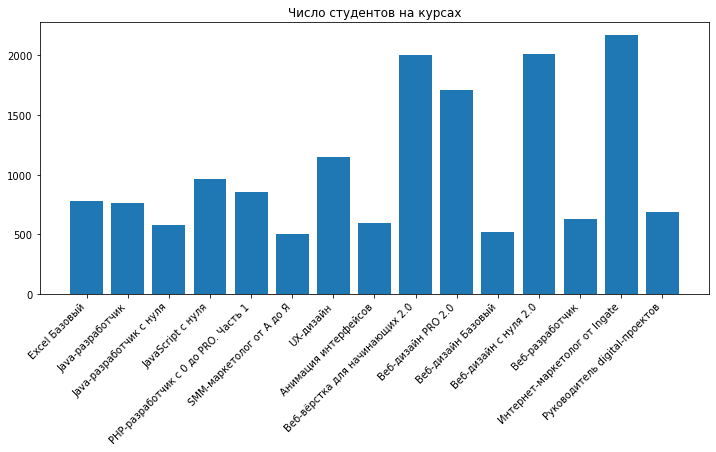

In [19]:
cout_students_on_course_data = total_courses_data.groupby('title')['student_id'].nunique()

plt.figure(figsize=(12, 5))
plt.bar(cout_students_on_course_data.index, cout_students_on_course_data.values)
plt.title('Число студентов на курсах')
plt.xticks(rotation=45, horizontalalignment ='right')
plt.show()

Bar-chart, отражающий количество студентов на каждом курсе. На графие нанесена линия медианы.

In [20]:
cout_students_on_course_data_grouped_by_field = total_courses_data.groupby(['field' ,'title'])['student_id']\
    .nunique()\
    .reset_index()

cout_students_on_course_data_grouped_by_field

,field,title,student_id
0,Business,Excel Базовый,782
1,Business,Руководитель digital-проектов,685
2,Design,UX-дизайн,1151
3,Design,Анимация интерфейсов,598
4,Design,Веб-дизайн PRO 2.0,1711
5,Design,Веб-дизайн Базовый,518
6,Design,Веб-дизайн с нуля 2.0,2014
7,Development,Java-разработчик,763
8,Development,Java-разработчик c нуля,581
9,Development,JavaScript с нуля,966


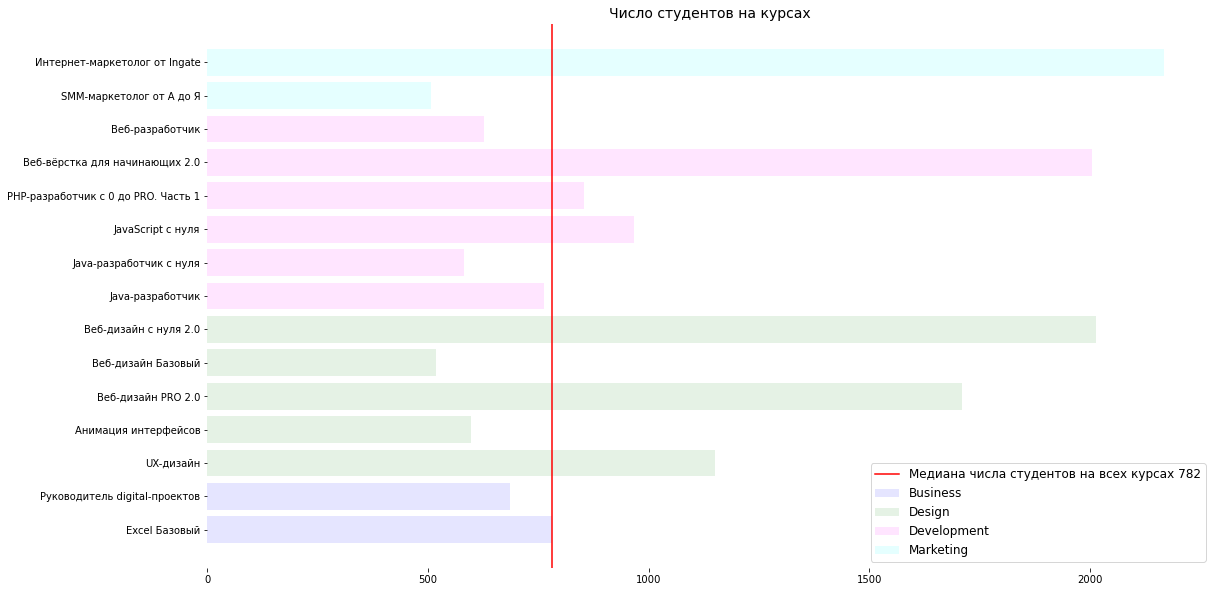

In [80]:
fig, ax = plt.subplots(figsize=(18,10))
median = cout_students_on_course_data.median()


for field, data in cout_students_on_course_data_grouped_by_field.groupby('field'):
    
    
    if field == 'Business':
        color='blue'
    elif field == 'Design':
        color='green'
    elif field == 'Marketing':
        color='cyan'
    else:
        color='magenta'
    
    ax.barh(data.title, 
            data.student_id,
            label=field, 
            alpha=0.1, color=color
            )
    
legend_without_duplicate_labels(ax)
    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)    

ax.axvline(x=median, color='red', label='Медиана числа студентов на всех курсах {}'.format(int(median)))

ax.set_title('Число студентов на курсах', fontsize=14)
ax.legend(loc='lower right', title=None, fontsize=12)
plt.show()

Описание данных на основании рассчитанных значений

Text(0.5, 1.0, 'Гистограмма возрастов студентов')

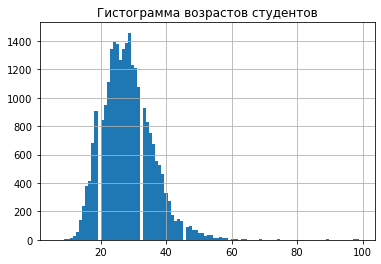

In [236]:
students_age.hist(bins=100)
plt.title("Гистограмма возрастов студентов")

Наиболее популярными направлениями являются интернет-маркетинг и веб-дизайн. Наименее популярные: веб-разработка, анимация интерфейсов, SMM, и PHP разработка.
График выше говорит, что курсы на платформе skillbox пользуются спросом у многих групп населения, но в основном это люди возрастом от 18 до 35-40 лет.
Число уроков в каждом модуле не имеют больших различий, то же касается и числа модулей в каждом курсе. Java разработка несколько выделяется по сравнению с другими курсами: много как количества модулей, так и уроков в каждом модуле. PHP-разработка - наоборот. Но в целом всё остально по числу уроков и модулей не сильно различается.

## 2. Расчет потенциальной нагрузки на преподавателей

1. Рассчет прироста студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Дата начала прохождения курса студентом считается по дате начала первой домашней работы.
2. Line-graph с приростом студентов в каждом месяце для каждого курса.
3. Line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса.
4. Количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывается, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз включены в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)
5. Line-graph по четвертому пункту.
6. Line-graph для всех курсов по четвертому пункту.
7. Вывод.

2.1. Рассчет прироста студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Дата начала прохождения курса студентом считается по дате начала первой домашней работы.

In [13]:
## Первый  подход
# Подготовка датасета согласно утверждению, что первая ДЗ, с которой начинается отсчет начала обучения студентом, 
# всегда находится в наиолее раннем модуле. 
# То есть начало обучения всех студентов в одном и том же курсе начинается с одного и того же ДЗ

first_hw_lessons = total_courses_data.copy()[total_courses_data.is_homework == True]\
                                  .sort_values(['module_number', 'lesson_number'])\
                                  .groupby(['course_id'])['module_number', 'lesson_number'].nth(0).reset_index()

total_first_hw_lessons = first_hw_lessons.merge(total_courses_data, on=['course_id', 'module_number', 'lesson_number'])
total_first_hw_lessons.head()

<ipython-input-13-296e9f4654cb>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  first_hw_lessons = total_courses_data.copy()[total_courses_data.is_homework == True]\


,course_id,module_number,lesson_number,progress_id,status,start_date,finish_date,student_id,title,field,module_title,lesson_title,lesson_token,is_video,is_homework
0,04ba6d0b40670c43a209141fa01fa784,1,3,81fb8b7412a483355d02d32987aaba6e,start,2018-07-07 10:13:37.089749+00:00,NaT,3dac07629e8e0b23af6654f6deda91c4,Анимация интерфейсов,Design,"Введение в Motion Design. Тренды, разновидност...",Домашняя работа,c4377574-d117-45c7-8da5-dd7d1923517d,False,True
1,04ba6d0b40670c43a209141fa01fa784,1,3,225784e4b9c1b3dcefc486f1e27f946b,start,2019-01-16 18:12:11.942899+00:00,NaT,b3c656269aeecf3a08f21d0df3574eca,Анимация интерфейсов,Design,"Введение в Motion Design. Тренды, разновидност...",Домашняя работа,c4377574-d117-45c7-8da5-dd7d1923517d,False,True
2,04ba6d0b40670c43a209141fa01fa784,1,3,c29cf5d7f832d3e82f99a118223eb729,done,2018-09-01 11:41:39.358335+00:00,2018-09-05 04:09:11.431596+00:00,af74a2b9b1eee0228d6de03c9be2d440,Анимация интерфейсов,Design,"Введение в Motion Design. Тренды, разновидност...",Домашняя работа,c4377574-d117-45c7-8da5-dd7d1923517d,False,True
3,04ba6d0b40670c43a209141fa01fa784,1,3,b431e4ed2a994d9a8435553c52967ffe,done,2018-09-25 13:22:30.172231+00:00,2018-09-25 18:19:33.176841+00:00,d3687c1d9beb51f8ebc7f7b2b595c8b4,Анимация интерфейсов,Design,"Введение в Motion Design. Тренды, разновидност...",Домашняя работа,c4377574-d117-45c7-8da5-dd7d1923517d,False,True
4,04ba6d0b40670c43a209141fa01fa784,1,3,611adeffa3b1c685f061d84bb34a4c16,done,2019-02-12 14:01:28.652737+00:00,2019-02-13 19:35:00.740491+00:00,125f9c1b4b5da2e62f8d21b0a2f1fbaf,Анимация интерфейсов,Design,"Введение в Motion Design. Тренды, разновидност...",Домашняя работа,c4377574-d117-45c7-8da5-dd7d1923517d,False,True


In [14]:
total_first_hw_lessons.groupby('title')['module_number'].unique()

title
Excel Базовый                          [1]
Java-разработчик                       [1]
Java-разработчик c нуля                [1]
JavaScript с нуля                      [1]
PHP-разработчик с 0 до PRO. Часть 1    [1]
SMM-маркетолог от А до Я               [1]
UX-дизайн                              [1]
Анимация интерфейсов                   [1]
Веб-вёрстка для начинающих 2.0         [1]
Веб-дизайн PRO 2.0                     [1]
Веб-дизайн Базовый                     [3]
Веб-дизайн с нуля 2.0                  [1]
Веб-разработчик                        [1]
Интернет-маркетолог от Ingate          [1]
Руководитель digital-проектов          [1]
Name: module_number, dtype: object

In [15]:
## Второй подход
# Подготовка датасета согласно утверждению, что первая ДЗ, с которой начинается отсчет начала обучения студентом, 
# может быть любой
# То есть начало обучения всех студентов в одном и том же курсе может начаться с любого домашнего задания в любом модуле

total_courses_with_homework = total_courses_data.copy()[total_courses_data.is_homework == True]\
                                  .sort_values(['module_number', 'lesson_number'])\
                                  .groupby(['course_id', 'student_id']).nth(0).reset_index()

# отбираю модули и уроки в которых есть домашене задание
# сортирую по номеру модуля и номеру урока, вверху списка будут первые уроки и модули с домашними заданиями
# группирую по id курса и студента, и отбираю верхние первые значения по заранее отсортированному датасету

total_courses_with_homework['month_start_studing'] = ((total_courses_with_homework['start_date'] + MonthEnd())\
                                                          .dt.strftime('%Y-%m-%d'))\
                                                          .apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d')) 
total_courses_with_homework.head()

,course_id,student_id,progress_id,module_number,lesson_number,status,start_date,finish_date,title,field,module_title,lesson_title,lesson_token,is_video,is_homework,month_start_studing
0,04ba6d0b40670c43a209141fa01fa784,027abaf37c31d668c2f0815f1a425a83,f6981e9b1ad794dcde89a1cf7976e467,1,3,start,2018-08-17 14:00:20.709385+00:00,NaT,Анимация интерфейсов,Design,"Введение в Motion Design. Тренды, разновидност...",Домашняя работа,c4377574-d117-45c7-8da5-dd7d1923517d,False,True,2018-08-31
1,04ba6d0b40670c43a209141fa01fa784,03151bc73bdb29fe1be1443c6d83e22f,3eaeaea0af7cb49ef30b84d73c940efa,1,3,start,2018-12-23 15:22:07.577951+00:00,NaT,Анимация интерфейсов,Design,"Введение в Motion Design. Тренды, разновидност...",Домашняя работа,c4377574-d117-45c7-8da5-dd7d1923517d,False,True,2018-12-31
2,04ba6d0b40670c43a209141fa01fa784,031c2baf0286e48dea898addfc2ecf8e,a42774f275c0ddcf57219c77f0bc10e7,1,3,start,2018-08-02 12:50:39.332479+00:00,NaT,Анимация интерфейсов,Design,"Введение в Motion Design. Тренды, разновидност...",Домашняя работа,c4377574-d117-45c7-8da5-dd7d1923517d,False,True,2018-08-31
3,04ba6d0b40670c43a209141fa01fa784,0352b1bc83ce327ede79abe04b09b7d7,bc56dcfc4421c7cf163e8839e7cbb881,1,3,done,2018-03-19 13:34:35.270844+00:00,2018-03-27 06:44:49.216129+00:00,Анимация интерфейсов,Design,"Введение в Motion Design. Тренды, разновидност...",Домашняя работа,c4377574-d117-45c7-8da5-dd7d1923517d,False,True,2018-03-31
4,04ba6d0b40670c43a209141fa01fa784,06acf599a6d3dbb60a968a94fa390cbe,cff67e60b246f9f3bc8c1b2274b56add,1,3,done,2019-02-05 13:32:05.352329+00:00,2019-02-06 14:55:32.539234+00:00,Анимация интерфейсов,Design,"Введение в Motion Design. Тренды, разновидност...",Домашняя работа,c4377574-d117-45c7-8da5-dd7d1923517d,False,True,2019-02-28


Дальнейшие расчеты и визуализации выполнены согласно "первому подходу"

In [16]:
total_courses_with_homework = total_first_hw_lessons

total_courses_with_homework['month_start_studing'] = ((total_courses_with_homework['start_date'] + MonthEnd())\
                                                          .dt.strftime('%Y-%m-%d'))\
                                                          .apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d')) 

count_of_new_students = total_courses_with_homework.copy()\
                            .groupby(['title', 'month_start_studing']).size().reset_index()\
                            .rename(columns={0: 'count_new_students'})
count_of_new_students

,title,month_start_studing,count_new_students
0,Excel Базовый,2018-02-28,6
1,Excel Базовый,2018-03-31,3
2,Excel Базовый,2018-05-31,3
3,Excel Базовый,2018-06-30,7
4,Excel Базовый,2018-07-31,14
...,...,...,...
239,Руководитель digital-проектов,2019-03-31,36
240,Руководитель digital-проектов,2019-04-30,17
241,Руководитель digital-проектов,2019-05-31,25
242,Руководитель digital-проектов,2019-06-30,15


2.2. Line-graph с приростом студентов в каждом месяце для каждого курса.

In [64]:
count_of_new_students.title.unique()

array(['Excel Базовый', 'Java-разработчик', 'Java-разработчик c нуля',
       'JavaScript с нуля', 'PHP-разработчик с 0 до PRO. Часть 1',
       'SMM-маркетолог от А до Я', 'UX-дизайн', 'Анимация интерфейсов',
       'Веб-вёрстка для начинающих 2.0', 'Веб-дизайн PRO 2.0',
       'Веб-дизайн Базовый', 'Веб-дизайн с нуля 2.0', 'Веб-разработчик',
       'Интернет-маркетолог от Ingate', 'Руководитель digital-проектов'],
      dtype=object)

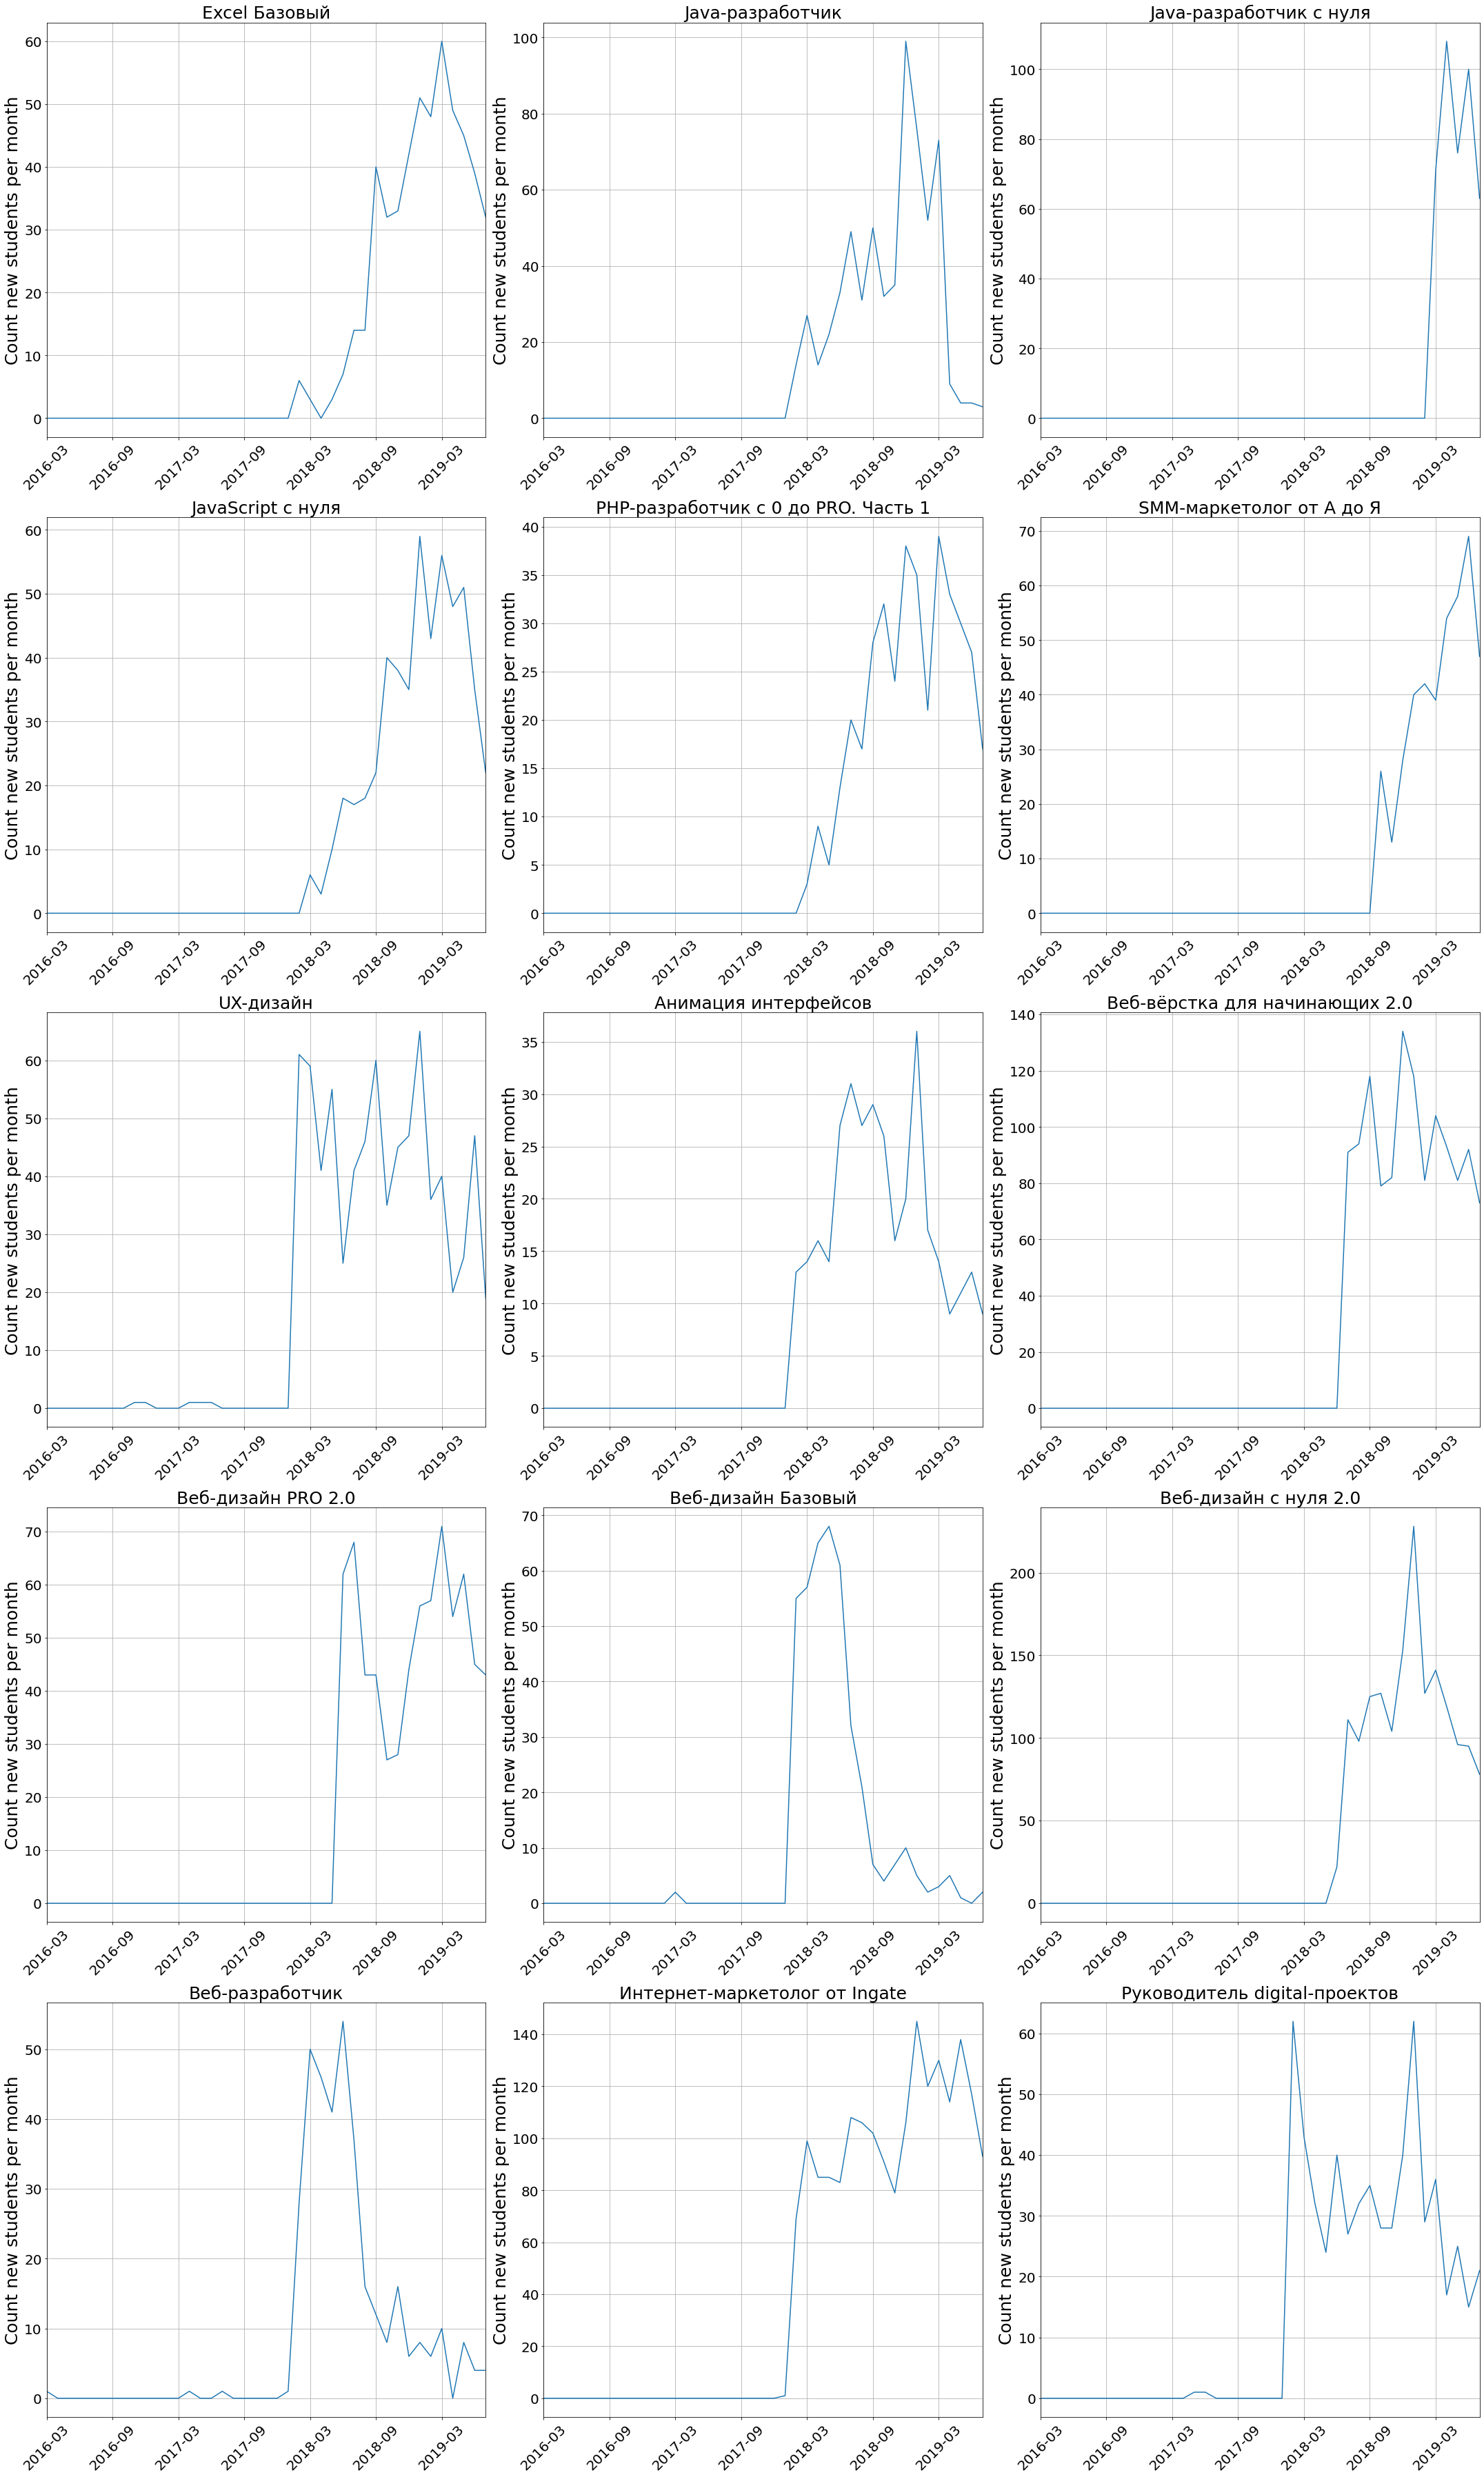

In [127]:
every_month_dates = pd.Series([month for month in pd.date_range('2016-03', '2019-08', freq='M')], name='month_start_studing')

fig,axes = plt.subplots(5,3, figsize=(30,50))

for ax,q in zip(axes.ravel(), count_of_new_students.title.unique()):
    
    course_type = count_of_new_students[count_of_new_students.title.eq(q)]
    
    course_type = course_type.merge(every_month_dates, how='right').sort_values('month_start_studing').reset_index(drop=True)
    course_type.title = course_type.title.fillna(q)
    course_type = course_type.fillna(0)
    
    course_type.plot(x='month_start_studing', y='count_new_students', ax=ax)
    
    month_dates = pd.date_range(course_type.month_start_studing.iloc[0],\
                               course_type.month_start_studing.iloc[-1], freq='M')
    if len(month_dates) <= 6:
            month_dates = pd.date_range(course_type.month_start_studing.iloc[0],\
                               course_type.month_start_studing.iloc[-1], freq='M')
    else:
        freq = len(month_dates) // 6
        month_dates = pd.date_range(course_type.month_start_studing.iloc[0],\
                               course_type.month_start_studing.iloc[-1], freq=str(freq)+'M')
    
    ax.set_title(q, fontsize=25)  
    ax.xaxis.label.set_visible(False)
    ax.legend().set_visible(False)
    ax.set_ylabel('Count new students per month', fontsize=25)
    
    ax.set_xticks(month_dates)
    ax.set_xticklabels([pd.to_datetime(str(month)).strftime('%Y-%m')\
                                           for month in month_dates], rotation=45)
    ax.minorticks_off()
    ax.tick_params(labelsize=20)
    ax.grid()
    plt.tight_layout()

2.3. Line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса.

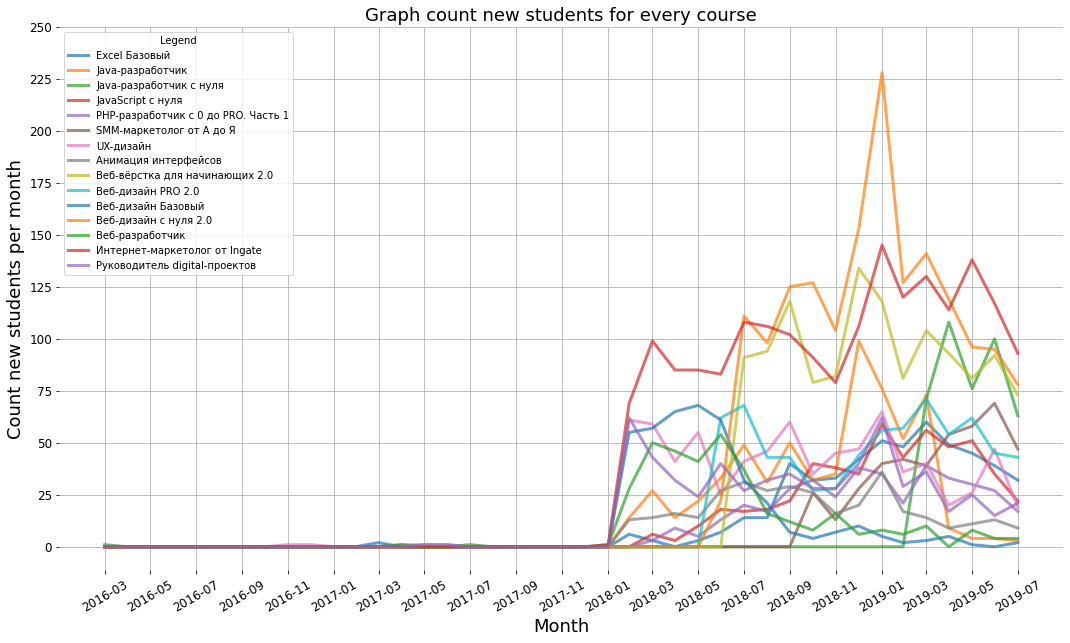

In [128]:
every_month_dates = pd.Series([month for month in pd.date_range('2016-03', '2019-08', freq='M')], name='month_start_studing')

fig, ax = plt.subplots(figsize=(18,10))

course_type_plot = []
for q in count_of_new_students.title.unique():
    course_type = count_of_new_students[count_of_new_students.title.eq(q)]
    course_type = course_type.merge(every_month_dates, how='right').sort_values('month_start_studing').reset_index(drop=True)
    course_type.title = course_type.title.fillna(q)
    course_type = course_type.fillna(0)
    
    plt.plot(course_type['month_start_studing'], course_type['count_new_students'], label=q, linewidth=3, alpha=0.7)

month_dates = pd.date_range('2016-03', '2019-08', freq='2M')
ax.set_title('Graph count new students for every course', fontsize=18)  
ax.set_xlabel('Month', fontsize=18)
ax.set_ylabel('Count new students per month', fontsize=18)
ax.tick_params(labelsize=12)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.set_xticks(month_dates) 
ax.set_xticklabels([pd.to_datetime(str(month)).strftime('%Y-%m') for month in month_dates], rotation=30)
ax.set_yticks(range(0, round(int(count_of_new_students['count_new_students'].max())+30, -1), 25))

ax.grid()
ax.legend(loc='upper left', title='Legend')
           
plt.show()

2.4. Количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывается, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз включены в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)

In [66]:
total_courses_data.head(1)
total_courses_data.size

5260155

In [232]:
total_courses_with_homework = total_courses_data.copy().sort_values('start_date')\
                              [(total_courses_data.is_homework == True)]

total_courses_with_homework['month_start_progress'] = (total_courses_with_homework['start_date']\
                                                      - dt.timedelta(days=1)\
                                                      + MonthEnd()).dt.strftime('%Y-%m-%d')\
                                                      .apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))
                                                     
total_courses_with_homework['month_end_progress'] = (total_courses_with_homework['finish_date']\
                                                      .fillna(total_courses_with_homework['start_date'])\
                                                      - dt.timedelta(days=1)\
                                                      + MonthEnd()).dt.strftime('%Y-%m-%d')\
                                                      .apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))
                                                     

<ipython-input-232-1346bf71f840>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  total_courses_with_homework = total_courses_data.copy().sort_values('start_date')\


In [233]:
count_month = list(((total_courses_with_homework.month_end_progress.iloc[i].year -\
                   total_courses_with_homework.month_start_progress.iloc[i].year)*12 +\
                  (total_courses_with_homework.month_end_progress.iloc[i].month -\
                   total_courses_with_homework.month_start_progress.iloc[i].month))+1\
                   for i in (range(len(total_courses_with_homework))))

In [234]:
total_courses_all_homework_month = total_courses_with_homework.copy()
total_courses_all_homework_month['len_in_month'] = count_month

mouth_with_progresses_df = total_courses_all_homework_month[['title', 'month_start_progress', 'len_in_month']]

In [238]:
# В тот раз именно этот этап был сделан неверно, протупил.Здесь создаю новый датафрейм из двух списков:
# первый это месяцы с прогрессами и курсы
# затем просто считаю количество прогрессов в каждом месяце группируя их по названию курса и считая их количество
# возможно замудренно вышло, но ничего проще в голову не пришло

import calendar

def add_months(sourcedate, months):
    month = sourcedate.month - 1 + months
    if month > 12:
        year = sourcedate.year + month // 12
        month = month % 12
    else:
        year = sourcedate.year
    day = calendar.monthrange(year,month)[1]
    return dt.date(year, month, day)

mouth_with_progresses = []
titles_with_progresses = []

mouths = mouth_with_progresses_df.month_start_progress
len_doing_homework = mouth_with_progresses_df.len_in_month

for name, data in mouth_with_progresses_df.groupby('title'):
    mouths = data.month_start_progress
    len_doing_homework = data.len_in_month
    for i in range(len(mouths)):
        for k in range(1, len_doing_homework.iloc[i]+1):
            mouth_with_progresses.append(add_months(mouths.iloc[i], k))
            titles_with_progresses.append(name)

In [253]:
data = {'title' : titles_with_progresses, 'month_start_progress' : mouth_with_progresses}

count_of_progresses = pd.DataFrame(data)\
    .groupby(['title','month_start_progress']).size()\
    .reset_index()\
    .rename(columns={0:'count_progressess'})
count_of_progresses.month_start_progress = pd.to_datetime(count_of_progresses.month_start_progress)
count_of_progresses

,title,month_start_progress,count_progressess
0,Excel Базовый,2018-02-28,37
1,Excel Базовый,2018-03-31,7
2,Excel Базовый,2018-04-30,13
3,Excel Базовый,2018-05-31,17
4,Excel Базовый,2018-06-30,37
...,...,...,...
253,Руководитель digital-проектов,2019-03-31,385
254,Руководитель digital-проектов,2019-04-30,284
255,Руководитель digital-проектов,2019-05-31,291
256,Руководитель digital-проектов,2019-06-30,231


2.5. Line-graph по четвертому пункту.

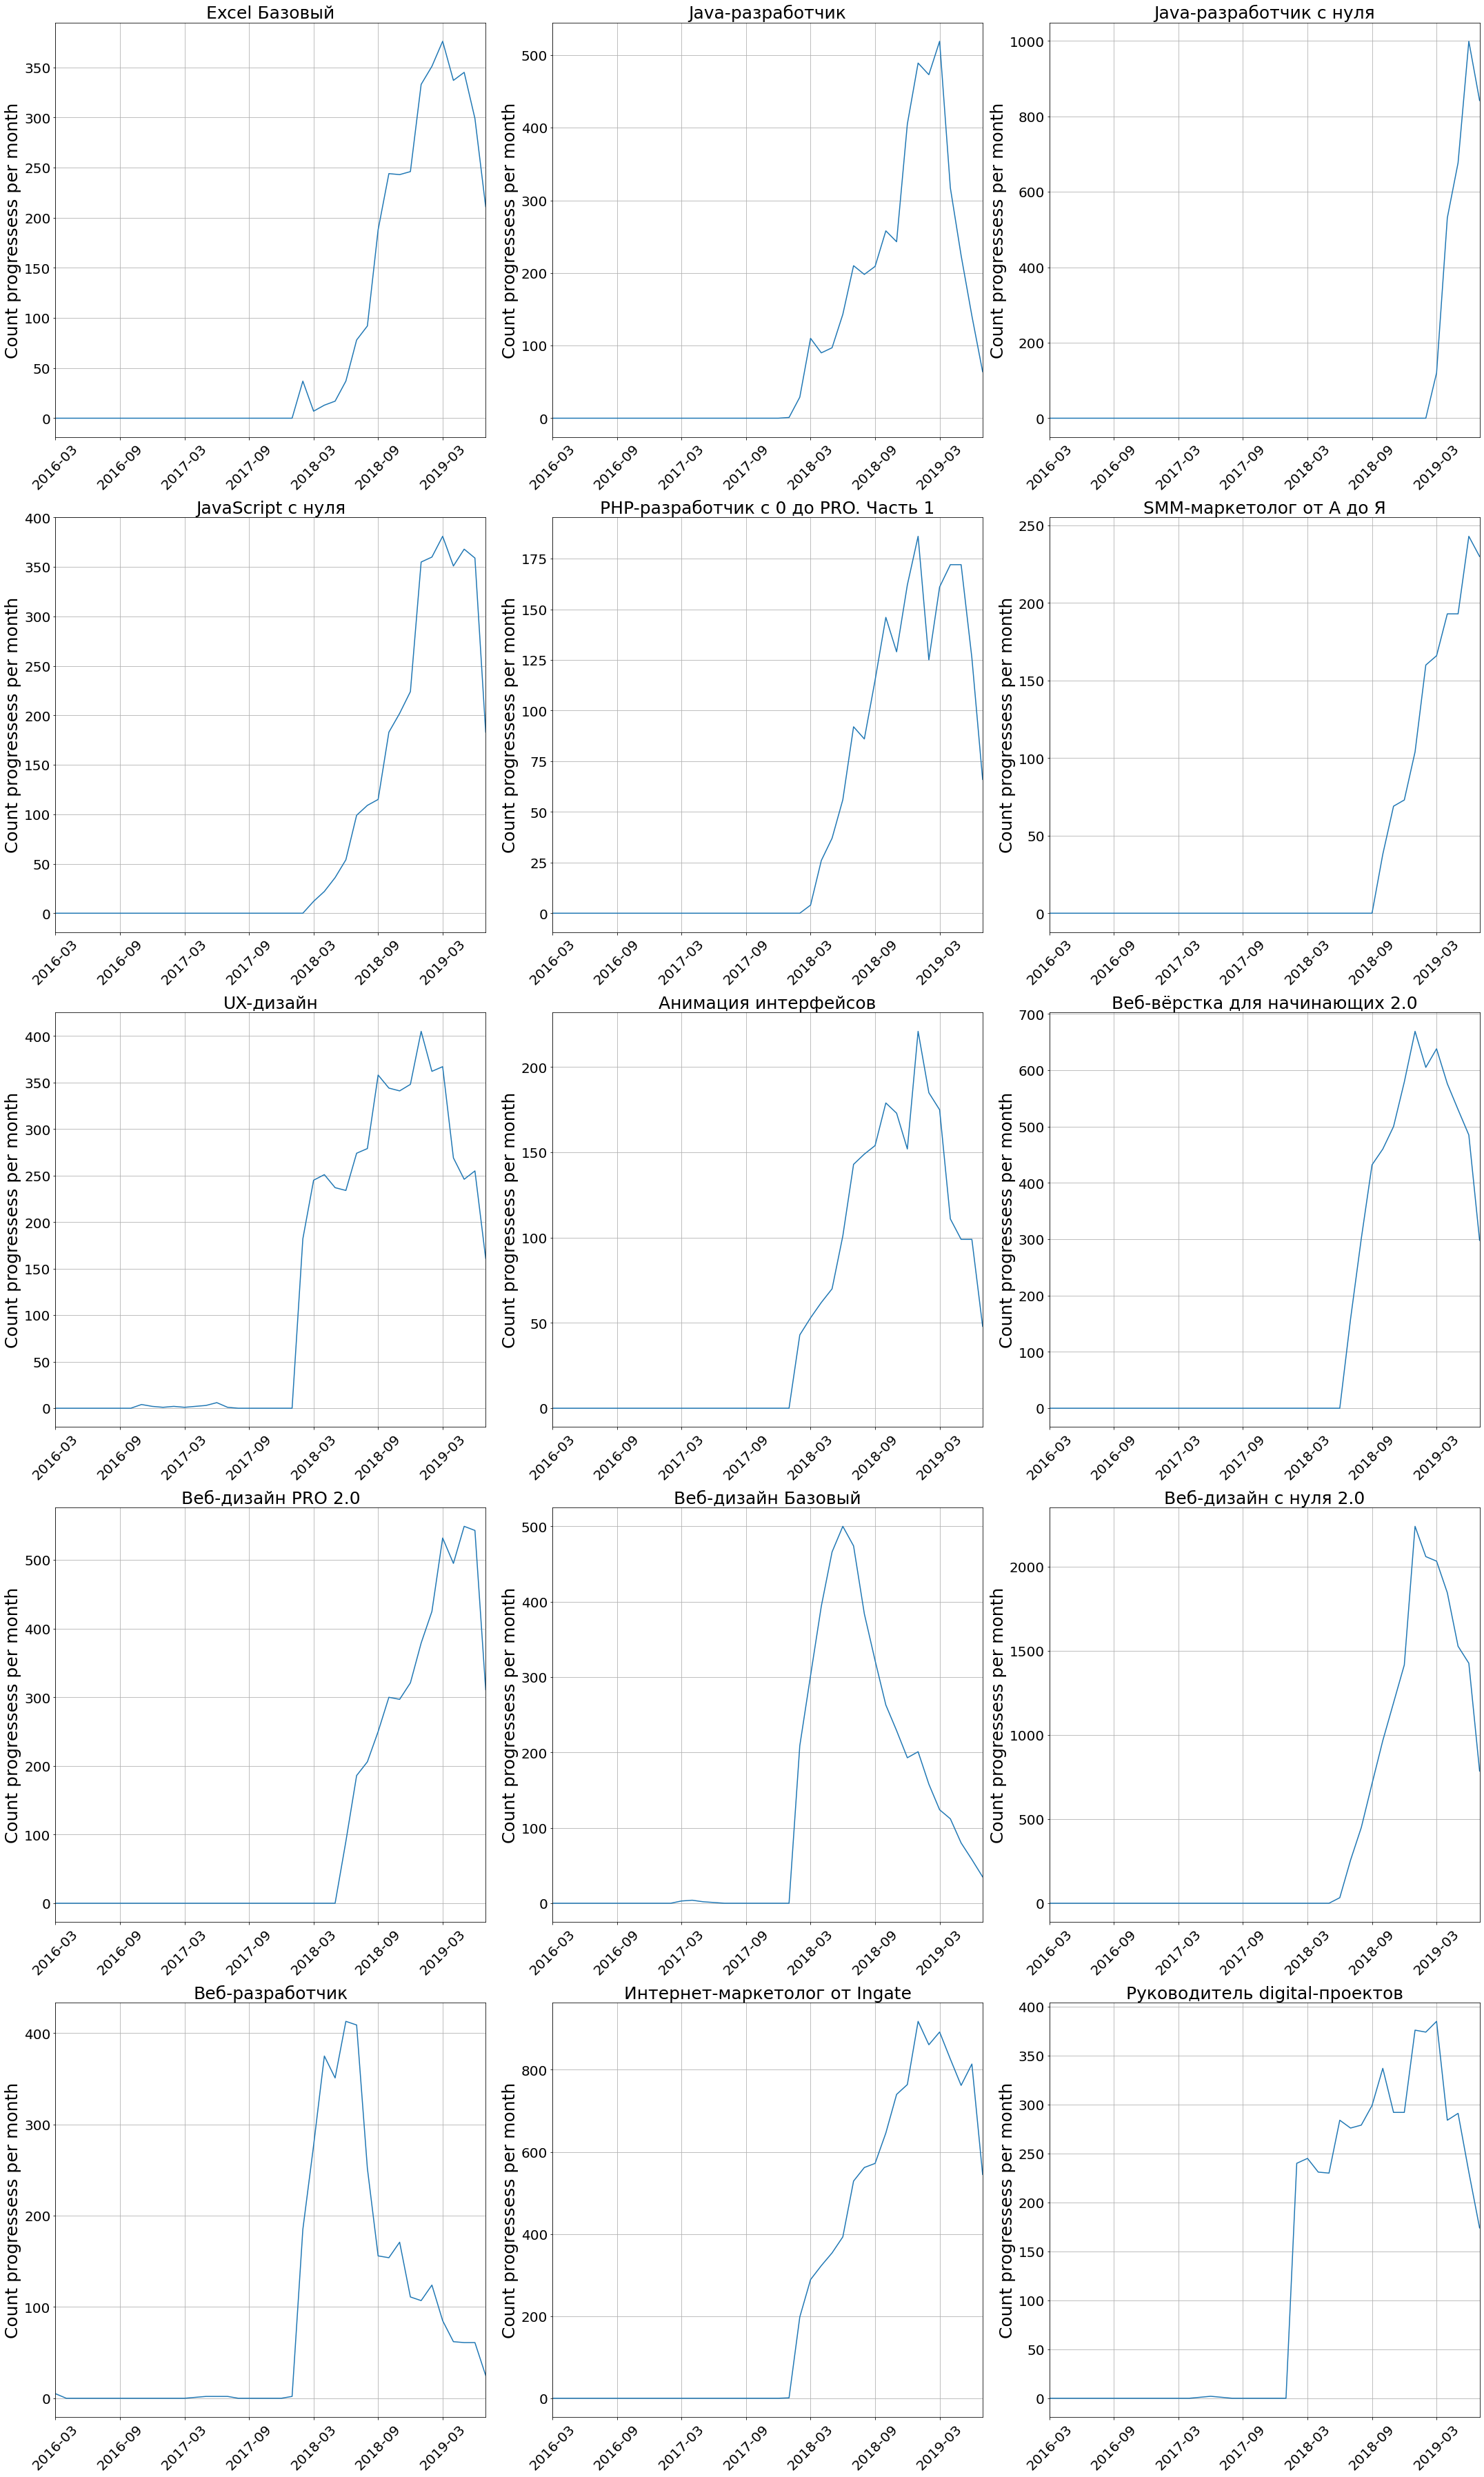

In [254]:
every_month_dates = pd.Series([month for month in pd.date_range('2016-03', '2019-08', freq='M')], 
                              name='month_start_progress')

fig,axes = plt.subplots(5,3, figsize=(30,50))

for ax,q in zip(axes.ravel(), count_of_progresses.title.unique()):
    
    course_type = count_of_progresses[count_of_progresses.title.eq(q)]
    
    course_type = course_type.merge(every_month_dates, how='right').sort_values('month_start_progress').reset_index(drop=True)
    course_type.title = course_type.title.fillna(q)
    course_type = course_type.fillna(0)
    
    course_type.plot(x='month_start_progress', y='count_progressess', ax=ax)
    
    month_dates = pd.date_range(course_type.month_start_progress.iloc[0],\
                               course_type.month_start_progress.iloc[-1], freq='M')
    if len(month_dates) <= 6:
            month_dates = pd.date_range(course_type.month_start_progress.iloc[0],\
                               course_type.month_start_progress.iloc[-1], freq='M')
    else:
        freq = len(month_dates) // 6
        month_dates = pd.date_range(course_type.month_start_progress.iloc[0],\
                               course_type.month_start_progress.iloc[-1], freq=str(freq)+'M')
    
    ax.set_title(q, fontsize=25)  
    ax.xaxis.label.set_visible(False)
    ax.legend().set_visible(False)
    ax.set_ylabel('Count progressess per month', fontsize=25)
    
    ax.set_xticks(month_dates)
    ax.set_xticklabels([pd.to_datetime(str(month)).strftime('%Y-%m')\
                                           for month in month_dates], rotation=45)
    ax.minorticks_off()
    ax.tick_params(labelsize=20)
    ax.grid()
    plt.tight_layout()

2.6. Line-graph для всех курсов по четвертому пункту.

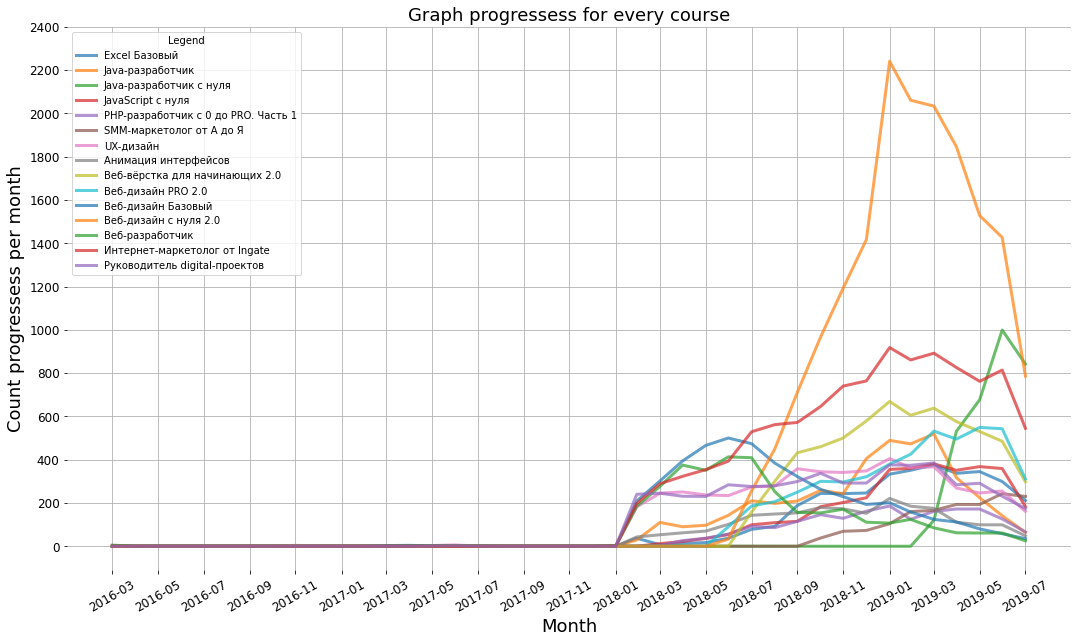

In [255]:
fig, ax = plt.subplots(figsize=(18,10))

course_type_plot = []
for q in count_of_new_students.title.unique():
    course_type = count_of_progresses[count_of_progresses.title.eq(q)]
    course_type = course_type.merge(every_month_dates, how='right').sort_values('month_start_progress')\
                      .reset_index(drop=True)
    course_type.title = course_type.title.fillna(q)
    course_type = course_type.fillna(0)
    
    plt.plot(course_type['month_start_progress'], course_type['count_progressess'], label=q, linewidth=3, alpha=0.7)

month_dates = pd.date_range('2016-03', '2019-08', freq='2M')
ax.set_title('Graph progressess for every course', fontsize=18)  
ax.set_xlabel('Month', fontsize=18)
ax.set_ylabel('Count progressess per month', fontsize=18)
ax.tick_params(labelsize=12)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.set_xticks(month_dates) 
ax.set_xticklabels([pd.to_datetime(str(month)).strftime('%Y-%m') for month in month_dates], rotation=30)
ax.set_yticks(range(0, round(int(count_of_progresses['count_progressess'].max())+200, -1), 200))

ax.grid()
ax.legend(loc='upper left', title='Legend')
           
plt.show()

2.7. Вывод.

Из увиденного на полученных гарфиках, можно сделать ввод, что онлайн-школа Скиллбок не пользовалась популярностью до начала 2018 года.
Может показаться, что тогда года существовало лишь 4 курса: UX-дизайн, Веб-дизайн базовый, Веб-разработчик и Руководитель digital-проектов.

Пик новых студентов приходится на конец 2018 года.
В период появления курса "Java-разработчик с нуля" заметен сильный спад прироста студентов курса "Java-разработчик", при этом суммарное количетво новых
в этом направлении растет. То же произошло с курсом "Веб-дизайн Базовый" - его заменил "Веб-дизайн с нуля 2.0". А вот курс "Веб-разработчик" утратил популярность.

Пиковость наблюдается в период новогодних прадзников. 

График прогрессов студентов, как ожидалось, более инертный чем гарфик количества новых студетов.
Учитывая, что на прохождение курса требуется от года до двух, а текущее количество новых студентов держится на около-пиковом уровне приблизительно год, можно 
предположить, что нагрузка на преподавателей, ведущих курсы, которые длятся больше года, может сильно возрасти.

## 3. Выявление проблемных модулей

1. Рассчет минимального, максимального, среднего, медианного времени прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считается разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле.
2. Line-graph с медианным временем прохождения каждого модуля для каждого курса.
3. Рассчет медианного времени выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса для выявления сезонности.
4. Line-graph, на который нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам.
5. Вывод.

3.1. Рассчет минимального, максимального, среднего, медианного времени прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считается разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле.

In [17]:
total_data_with_homework = total_courses_data.copy()[(total_courses_data.is_homework == True) & (total_courses_data.status == 'done')]
total_data_with_homework.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,title,field,module_title,lesson_title,lesson_token,is_video,is_homework
3555,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00:00,2018-06-28 15:59:25.320418+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True
3556,3b9dce04f32da32763124602557f92a3,1,6,done,2019-03-16 15:28:29.978311+00:00,2019-03-18 09:51:16.562395+00:00,03151bc73bdb29fe1be1443c6d83e22f,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True
3557,73e17a05355852fe65b785c82c37d1ad,1,6,done,2019-07-02 19:01:15.282595+00:00,2019-07-03 18:10:52.187797+00:00,ed235f47e16da6e83d3f1cb511f38ea6,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True
3558,cc3eb34ae49c719648352c4175daee88,1,6,done,2018-07-25 09:39:56.674653+00:00,2018-07-27 15:39:17.613950+00:00,59e8681cb7b5c8043ae1aac10c8053ca,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True
3559,04ace4fe130d90c801e24eea13ee808e,1,6,done,2019-04-24 18:11:57.823830+00:00,2019-04-25 10:11:25.756062+00:00,c16250079190337fe9074736e33eecb2,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True


In [18]:
# для каждого курса и студента нахожу первую дату начала обучения и последнюю дату конца обучения в конкретном модуле

start_date_data =total_data_with_homework.groupby(
    ['title', 'module_number', 'student_id']
).start_date.min().reset_index()

end_date_data = total_data_with_homework.groupby(
    ['title', 'module_number', 'student_id']
).finish_date.max().reset_index()

In [19]:
end_date_data.head()

,title,module_number,student_id,finish_date
0,Excel Базовый,1,001b192f899a84496be98b41906246fc,2019-03-31 07:19:02.064532+00:00
1,Excel Базовый,1,006f0189ec657741ee4d53474c7a258d,2019-01-26 09:52:36.422160+00:00
2,Excel Базовый,1,0074621b6955733338ab0feb2a9a2100,2019-04-13 05:57:59.476184+00:00
3,Excel Базовый,1,0098ca12f73a56dadbf6099389305d80,2019-04-05 09:37:10.695661+00:00
4,Excel Базовый,1,0284a9c2ee0d9c7a97e2a943b0d52b92,2018-07-09 07:30:19.932155+00:00


In [20]:
start_date_data.head()

,title,module_number,student_id,start_date
0,Excel Базовый,1,001b192f899a84496be98b41906246fc,2019-03-29 20:43:08.914029+00:00
1,Excel Базовый,1,006f0189ec657741ee4d53474c7a258d,2019-01-25 03:25:26.690241+00:00
2,Excel Базовый,1,0074621b6955733338ab0feb2a9a2100,2019-04-10 14:09:35.364174+00:00
3,Excel Базовый,1,0098ca12f73a56dadbf6099389305d80,2019-04-03 11:06:03.164368+00:00
4,Excel Базовый,1,0284a9c2ee0d9c7a97e2a943b0d52b92,2018-07-07 12:42:17.184315+00:00


In [21]:
start_end_module_by_student_data = \
    start_date_data.merge(
    end_date_data, on=['title', 'module_number', 'student_id'])\
    [['title', 'module_number','student_id', 'start_date', 'finish_date']]

len_studing = \
    start_end_module_by_student_data.finish_date - start_end_module_by_student_data.start_date
start_end_module_by_student_data['len_studing'] = len_studing.dt.days

start_end_module_by_student_data.head()

,title,module_number,student_id,start_date,finish_date,len_studing
0,Excel Базовый,1,001b192f899a84496be98b41906246fc,2019-03-29 20:43:08.914029+00:00,2019-03-31 07:19:02.064532+00:00,1
1,Excel Базовый,1,006f0189ec657741ee4d53474c7a258d,2019-01-25 03:25:26.690241+00:00,2019-01-26 09:52:36.422160+00:00,1
2,Excel Базовый,1,0074621b6955733338ab0feb2a9a2100,2019-04-10 14:09:35.364174+00:00,2019-04-13 05:57:59.476184+00:00,2
3,Excel Базовый,1,0098ca12f73a56dadbf6099389305d80,2019-04-03 11:06:03.164368+00:00,2019-04-05 09:37:10.695661+00:00,1
4,Excel Базовый,1,0284a9c2ee0d9c7a97e2a943b0d52b92,2018-07-07 12:42:17.184315+00:00,2018-07-09 07:30:19.932155+00:00,1


In [22]:
description_start_end_module_by_student_data = start_end_module_by_student_data\
    .groupby(['title', 'module_number'])\
    .len_studing.aggregate(['min', 'max', 'mean', 'median']).reset_index()

In [23]:
description_start_end_module_by_student_data

,title,module_number,min,max,mean,median
0,Excel Базовый,1,-1,183,5.458515,2.0
1,Excel Базовый,2,-1,184,3.758621,1.0
2,Excel Базовый,3,-1,89,2.850129,1.0
3,Excel Базовый,4,-1,327,10.363036,3.0
4,Excel Базовый,5,-1,175,6.803704,2.5
...,...,...,...,...,...,...
185,Руководитель digital-проектов,12,-1,211,20.647727,7.0
186,Руководитель digital-проектов,13,-1,246,25.420290,11.0
187,Руководитель digital-проектов,14,-1,199,13.968750,7.0
188,Руководитель digital-проектов,15,-1,132,5.984375,2.0


3.2. Line-graph с медианным временем прохождения каждого модуля для каждого курса.

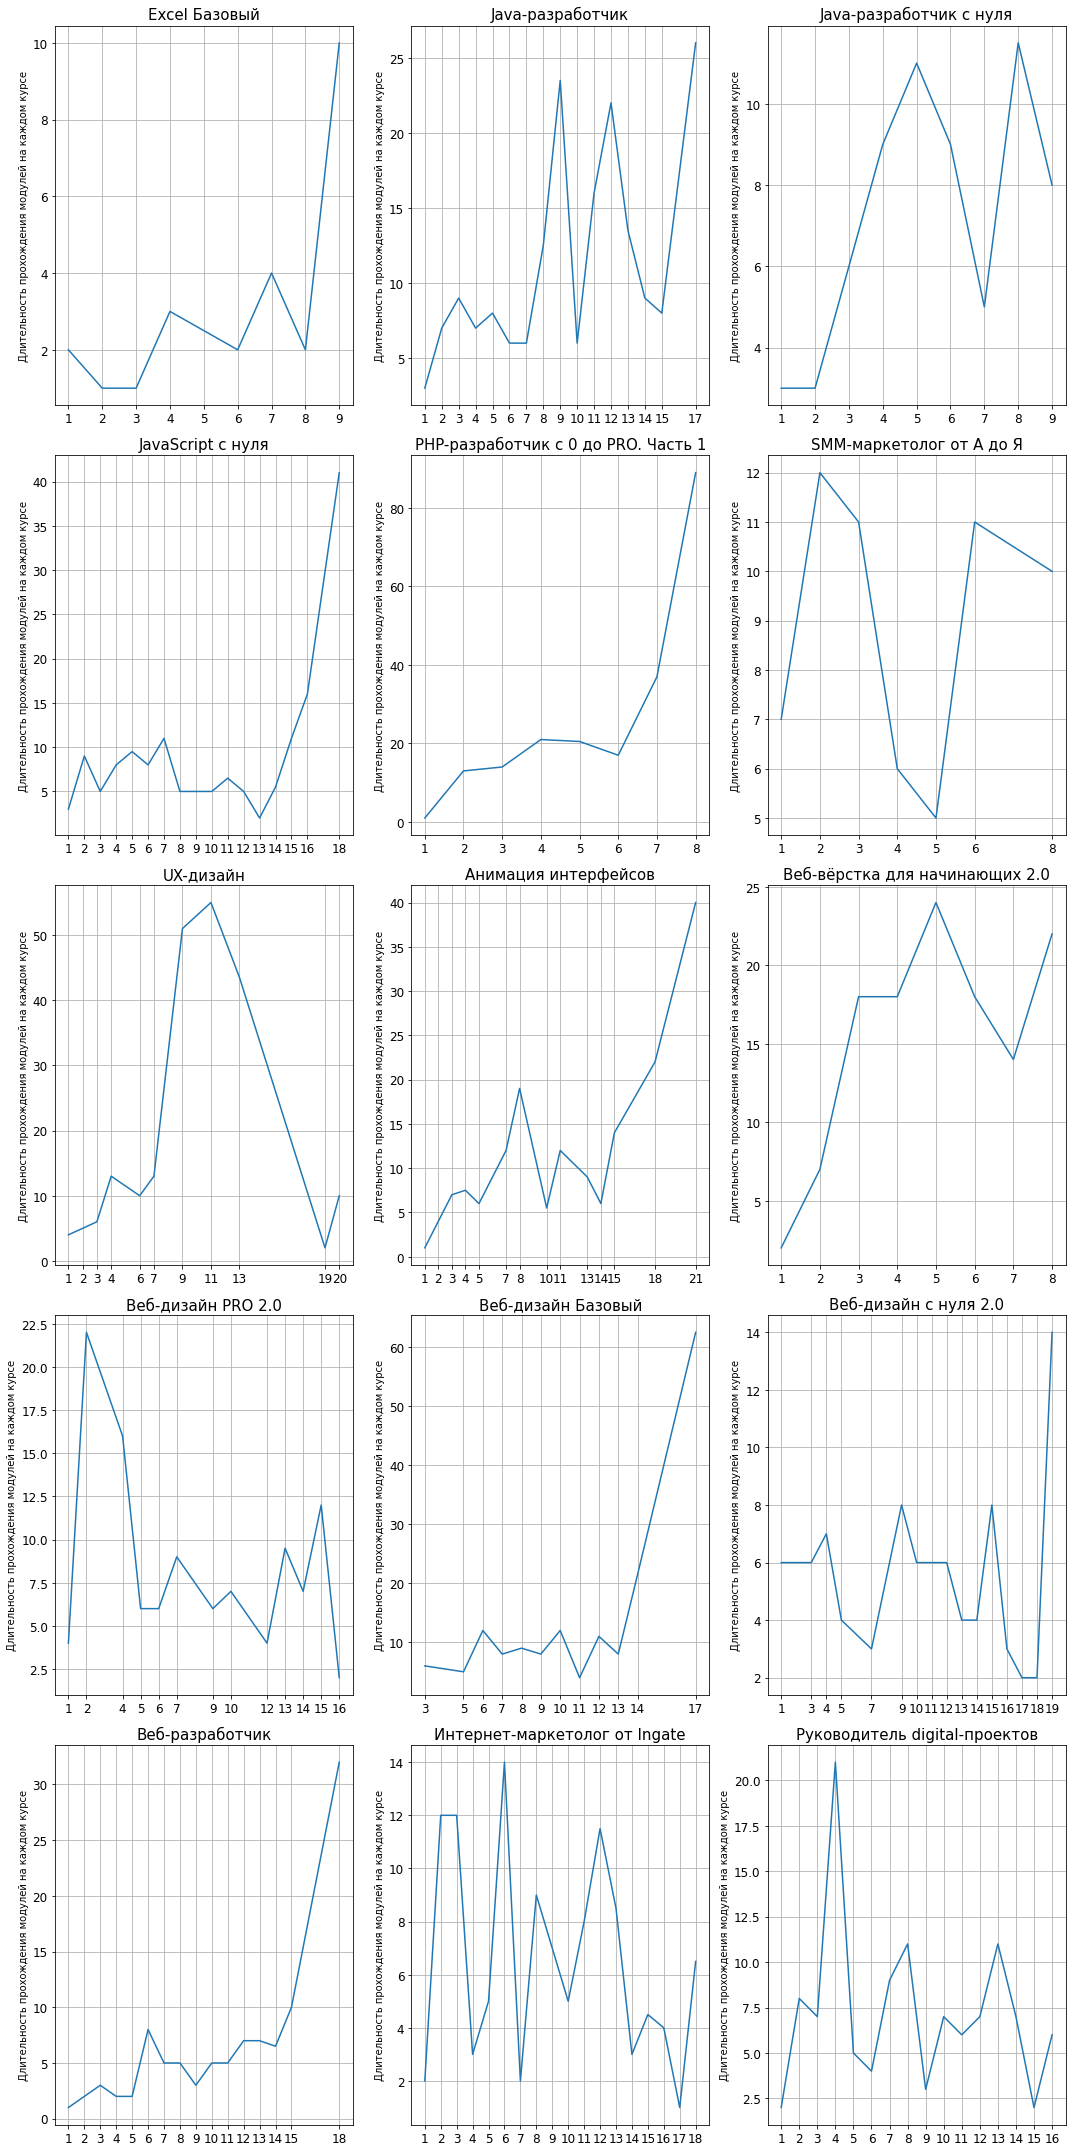

In [47]:
fig,axes = plt.subplots(5,3, figsize=(15,30))

start_end_module_by_student_data['str_len_studing'] = start_end_module_by_student_data.len_studing.apply(lambda x: str(x))

for ax,q in zip(axes.ravel(), start_end_module_by_student_data.title.unique()):
    
    course_data = description_start_end_module_by_student_data[description_start_end_module_by_student_data.title.eq(q)]
    
    course_data.plot(x='module_number', y='median', ax=ax)
    
    module_numbers = course_data.module_number.unique()
    
    module_numbers_ticks = range(1, len(module_numbers)+1)
    module_numbers_str = [str(i) for i in module_numbers]
    
    ax.set_xticks(module_numbers)
    ax.set_xticklabels(module_numbers)
    
    ax.set_title(q, fontsize=15)  
    ax.xaxis.label.set_visible(False)
    ax.legend().set_visible(False)
    ax.set_ylabel('Длительность прохождения модулей на каждом курсе', fontsize=10)
    
    ax.minorticks_off()
    ax.tick_params(labelsize=12)
    ax.grid()
    plt.tight_layout()

3.3. Рассчет медианного времени выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса для выявления сезонности.

In [24]:
start_end_module_by_student_data['month_start_studing'] = start_end_module_by_student_data['start_date']\
                                                          .dt.strftime('%m')
start_end_module_by_student_data.head()

,title,module_number,student_id,start_date,finish_date,len_studing,month_start_studing
0,Excel Базовый,1,001b192f899a84496be98b41906246fc,2019-03-29 20:43:08.914029+00:00,2019-03-31 07:19:02.064532+00:00,1,03
1,Excel Базовый,1,006f0189ec657741ee4d53474c7a258d,2019-01-25 03:25:26.690241+00:00,2019-01-26 09:52:36.422160+00:00,1,01
2,Excel Базовый,1,0074621b6955733338ab0feb2a9a2100,2019-04-10 14:09:35.364174+00:00,2019-04-13 05:57:59.476184+00:00,2,04
3,Excel Базовый,1,0098ca12f73a56dadbf6099389305d80,2019-04-03 11:06:03.164368+00:00,2019-04-05 09:37:10.695661+00:00,1,04
4,Excel Базовый,1,0284a9c2ee0d9c7a97e2a943b0d52b92,2018-07-07 12:42:17.184315+00:00,2018-07-09 07:30:19.932155+00:00,1,07


In [25]:
start_end_module_by_student_data_len_studing_by_month = start_end_module_by_student_data\
    .groupby(['title', 'month_start_studing'])['len_studing'].median().reset_index()

In [26]:
start_end_module_by_student_data_len_studing_by_month

,title,month_start_studing,len_studing
0,Excel Базовый,01,2.0
1,Excel Базовый,02,2.0
2,Excel Базовый,03,2.0
3,Excel Базовый,04,1.0
4,Excel Базовый,05,2.0
...,...,...,...
166,Руководитель digital-проектов,08,13.0
167,Руководитель digital-проектов,09,10.0
168,Руководитель digital-проектов,10,4.0
169,Руководитель digital-проектов,11,5.5


4. Line-graph, на который нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам.

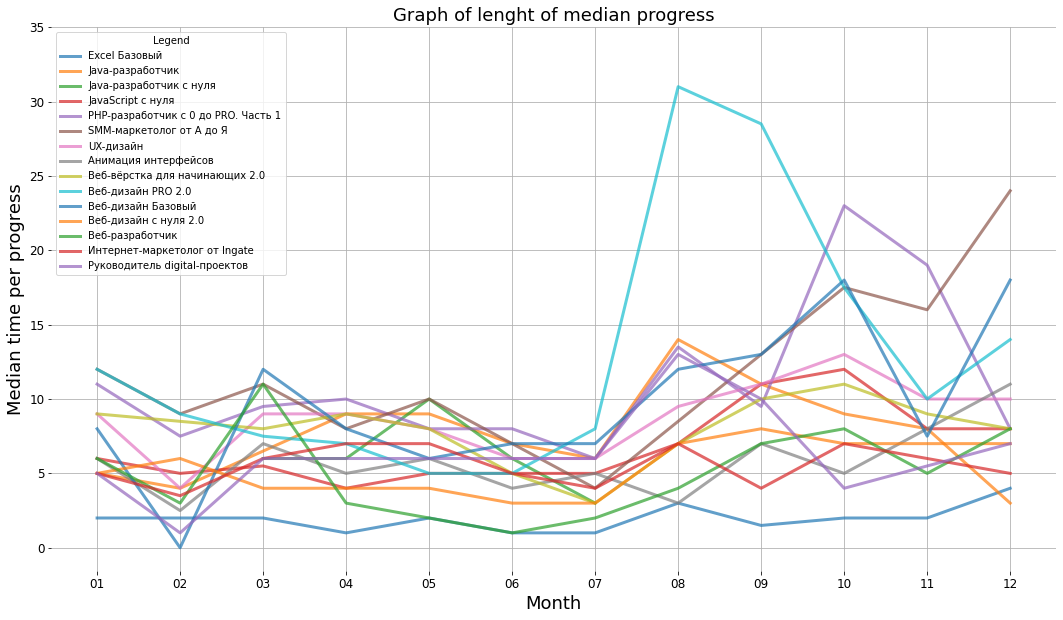

In [32]:
fig, ax = plt.subplots(figsize=(18,10))

data = start_end_module_by_student_data_len_studing_by_month.copy()
course_type_plot = []
for q in data.title.unique():
    course_type = data[data.title.eq(q)]
    
    plt.plot(course_type['month_start_studing'], course_type['len_studing'], label=q, linewidth=3, alpha=0.7)

ax.set_title('Graph of lenght of median progress', fontsize=18)  
ax.set_xlabel('Month', fontsize=18)
ax.set_ylabel('Median time per progress', fontsize=18)
ax.tick_params(labelsize=12)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.set_yticks(range(0, round(int(data['len_studing'].max())+5, -1), 5))

ax.grid()
ax.legend(loc='upper left', title='Legend')
           
plt.show()

3.5. Вывод.

Разброс во времени выполнения домашних работ довольно большой, имеются выбросы. Посмотрев "глазами" можно допустить, что следующие модули даются студентам сложнее остальных:

In [16]:
dict_of_long_done_modules = {
    'Excel Базовый': [9],
    'Веб-дизайн PRO 2.0': [2, 4],
    'Интернет-маркетолог от Ingate': [],
    'UX-дизайн': [],
    'JavaScript с нуля': [],
    'Веб-дизайн с нуля 2.0': [19],
    'Веб-разработчик': [18],
    'Анимация интерфейсов': [18, 21],
    'Веб-вёрстка для начинающих 2.0': [],
    'Руководитель digital-проектов': [4],
    'PHP-разработчик с 0 до PRO. Часть 1': [7, 8],
    'SMM-маркетолог от А до Я': [],
    'Веб-дизайн Базовый': [14, 17],
    'Java-разработчик': [],
    'Java-разработчик c нуля': []                       
}

for title, problem_module_numbers in dict_of_long_done_modules.items():
    if len(problem_module_numbers) > 0:
        print('\n', title, ':')
        for problem_module_number in problem_module_numbers:
            print('    ', total_courses_data[
                (total_courses_data.module_number == problem_module_number) & 
                (total_courses_data.title == title)
            ].module_title.iloc[0])


 Excel Базовый :
     Экзаменационная работа 

 Веб-дизайн PRO 2.0 :
     Концептуальный дизайн
      Введение в UX

 Веб-дизайн с нуля 2.0 :
     Первый кейс на Behance

 Веб-разработчик :
     Экзаменационная работа 

 Анимация интерфейсов :
     Чистая магия — cоздание продающего шоурила
     Дипломная работа

 Руководитель digital-проектов :
     Аналитика. Базовые навыки

 PHP-разработчик с 0 до PRO. Часть 1 :
     База данных MySQL
     Курсовая работа

 Веб-дизайн Базовый :
     Инфографика: как сделать сайты интересными
     Дипломная работа


БОльшую часть длинных домашних работ занимают курсовые и дипломные проекты то, что студенты догло их делают не означает, что с этими модулями что-то не так. Отбросив их стаются лишь:

In [17]:
dict_of_long_done_modules = {
    'Excel Базовый': [],
    'Веб-дизайн PRO 2.0': [2, 4],
    'Интернет-маркетолог от Ingate': [],
    'UX-дизайн': [],
    'JavaScript с нуля': [],
    'Веб-дизайн с нуля 2.0': [19],
    'Веб-разработчик': [],
    'Анимация интерфейсов': [18],
    'Веб-вёрстка для начинающих 2.0': [],
    'Руководитель digital-проектов': [4],
    'PHP-разработчик с 0 до PRO. Часть 1': [7],
    'SMM-маркетолог от А до Я': [],
    'Веб-дизайн Базовый': [14],
    'Java-разработчик': [],
    'Java-разработчик c нуля': []                       
}

for title, problem_module_numbers in dict_of_long_done_modules.items():
    if len(problem_module_numbers) > 0:
        print('\n', title, ':')
        for problem_module_number in problem_module_numbers:
            print('    ', total_courses_data[
                (total_courses_data.module_number == problem_module_number) & 
                (total_courses_data.title == title)
            ].module_title.iloc[0])


 Веб-дизайн PRO 2.0 :
     Концептуальный дизайн
      Введение в UX

 Веб-дизайн с нуля 2.0 :
     Первый кейс на Behance

 Анимация интерфейсов :
     Чистая магия — cоздание продающего шоурила

 Руководитель digital-проектов :
     Аналитика. Базовые навыки

 PHP-разработчик с 0 до PRO. Часть 1 :
     База данных MySQL

 Веб-дизайн Базовый :
     Инфографика: как сделать сайты интересными


Судя по графику медианного времени выполнения домашних работ в каждом курсе можно сделать вывод, что продуктивность студентов сильно снижается с конца лета до конца года, при чем в январе время прохождения модулей значительно ниже чем в декабре и держится на этом уровне вплоть до июля. С чем это может быть связанно? Посмотрю на сезонность прихода новых студентов:

In [35]:
count_of_new_students['start_month'] = count_of_new_students['month_start_studing']\
                                                          .dt.strftime('%m')
count_of_new_students_per_month = count_of_new_students.copy()\
                            .groupby(['start_month']).sum()

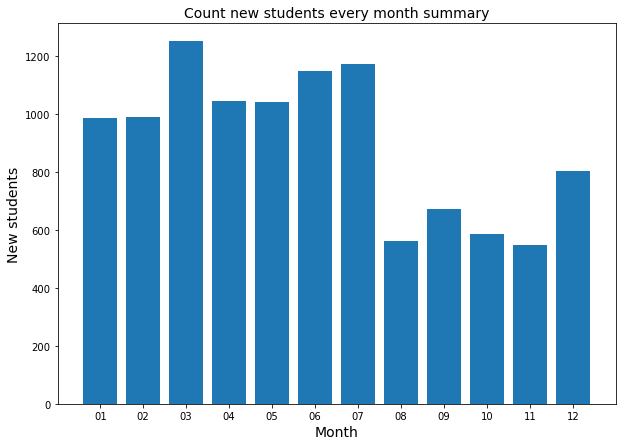

In [43]:
plt.subplots(figsize=(10,7))
plt.bar(count_of_new_students_per_month.index, count_of_new_students_per_month['count_new_students'])

plt.title('Count new students every month summary', fontsize=14)  
plt.xlabel('Month', fontsize=14)
plt.ylabel('New students', fontsize=14)
ax.tick_params(labelsize=12)

В первой половине года новых студентов приходит гораздо больше чем во второй. Есть обратная корреляция. В целом активность к познанию, исходя их этих данных, у людей снижается ближе к осени.

## 4. Расчет конверсии

1. Конверсия перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).
2. Bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе.
3. Bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. Цвет столбцов графиков содержит информацию о сфере, к которой относится курс.

4.1. Конверсия перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).

In [79]:
courses_with_homework = total_courses_data.copy().sort_values('start_date')\
                              [(total_courses_data.is_homework == True)]


courses_grouped_data = None
for name_1, data_1 in list(courses_with_homework.groupby('title')):
    count_students_started_hws_in_module = []
    count_students_ended_hws_in_module = []
    for name_2, data_2 in list(data_1.groupby('module_number')):
        if len(data_2.groupby('lesson_title')) == 1:
            count_students_started_hws_in_module.append(len(data_2))
            count_students_ended_hws_in_module.append(len(data_2[data_2.status == 'done']))
        else:
            first_hw_data = list(data_2.groupby('lesson_title'))[0][1]
            count_students_started_hws_in_module.append(len(first_hw_data))
            last_hw_data = list(data_2.groupby('lesson_title'))[-1][1]
            count_students_ended_hws_in_module.append(len(first_hw_data[first_hw_data.status == 'done']))
    
    courses_grouped_data_1 = data_1.groupby(['title', 'module_number', 'module_title'])\
                                 .size()\
                                 .reset_index()\
                                 .drop(0, axis=1)

    list_convertion = [100]
    for i in range(1, len(count_students_started_hws_in_module)):
        if count_students_ended_hws_in_module[i-1] == 0:
            list_convertion.append(None)
        elif count_students_started_hws_in_module[i] / \
             count_students_ended_hws_in_module[i-1] > 1:
            list_convertion.append(None)
        else:
            list_convertion.append(round(\
                                     count_students_started_hws_in_module[i] / \
                                     count_students_ended_hws_in_module[i-1] * \
                                     100, 2)\
                                    )

    courses_grouped_data_1['count_students_started'] = count_students_started_hws_in_module
    courses_grouped_data_1['count_students_ended'] = count_students_ended_hws_in_module
    courses_grouped_data_1['conversion'] = list_convertion
    courses_grouped_data_1 = courses_grouped_data_1.fillna(courses_grouped_data_1.conversion.median())
    
    if courses_grouped_data is None:
        courses_grouped_data = courses_grouped_data_1
    else:
        courses_grouped_data = courses_grouped_data.append(courses_grouped_data_1)

courses_grouped_data

<ipython-input-79-7fd80e44de29>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  courses_with_homework = total_courses_data.copy().sort_values('start_date')\


,title,module_number,module_title,count_students_started,count_students_ended,conversion
0,Excel Базовый,1,Основной функционал Excel,518,458,100.00
1,Excel Базовый,2,Основной функционал Excel (продолжение),434,406,94.76
2,Excel Базовый,3,Формулы и функции Excel. Введение,398,387,98.03
3,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,345,303,89.15
4,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,298,270,98.35
...,...,...,...,...,...,...
11,Руководитель digital-проектов,12,Решение факапов. Lean/TOC. Обзор.,95,88,96.94
12,Руководитель digital-проектов,13,Интеграционные проекты.,87,69,98.86
13,Руководитель digital-проектов,14,Управление дизайнерами. Разработка дизайна по ...,71,64,98.68
14,Руководитель digital-проектов,15,Основы технической грамотности,66,64,98.68


4.2. Bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе.

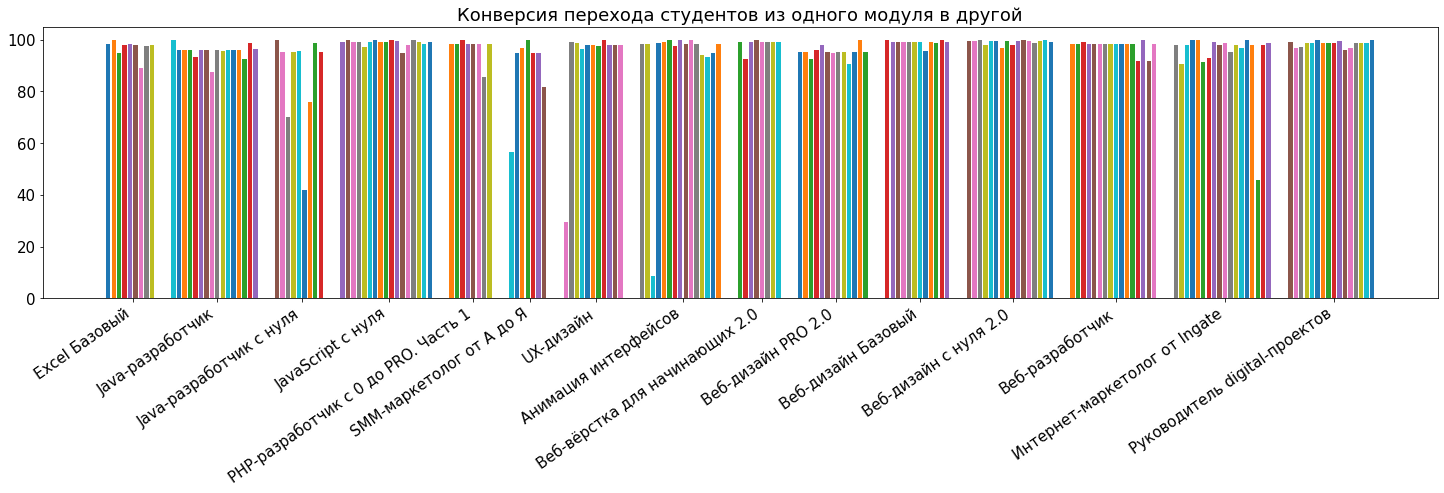

In [82]:
plt.figure(figsize=(25, 5))
x = 0

list_x = []
list_names = []

for name_title, data_title in courses_grouped_data.groupby(['title']):
    for name, data in data_title.groupby('module_title'):
        plt.bar(x, data.conversion.values)
        x += 1
    list_x.append(x - len(data_title)/2)
    list_names.append(name_title)
    x += 3
plt.title('Конверсия перехода студентов из одного модуля в другой', fontsize=18)
plt.xticks(list_x, list_names, horizontalalignment ='right', rotation=35)
plt.tick_params(labelsize=15)
# plt.legend()
plt.show()

4.3. Bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. Цвет столбцов графиков содержит информацию о сфере, к которой относится курс.

In [99]:
courses_grouped_data_field

,title,module_number,module_title,count_students_started,count_students_ended,conversion,field
0,Excel Базовый,1,Основной функционал Excel,518,458,100.00,Business
1,Excel Базовый,2,Основной функционал Excel (продолжение),434,406,94.76,Business
2,Excel Базовый,3,Формулы и функции Excel. Введение,398,387,98.03,Business
3,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,345,303,89.15,Business
4,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,298,270,98.35,Business
...,...,...,...,...,...,...,...
186,Руководитель digital-проектов,12,Решение факапов. Lean/TOC. Обзор.,95,88,96.94,Business
187,Руководитель digital-проектов,13,Интеграционные проекты.,87,69,98.86,Business
188,Руководитель digital-проектов,14,Управление дизайнерами. Разработка дизайна по ...,71,64,98.68,Business
189,Руководитель digital-проектов,15,Основы технической грамотности,66,64,98.68,Business


In [83]:
courses_grouped_data_field = courses_grouped_data.merge(total_courses_data.groupby(['title']).first().field.reset_index())

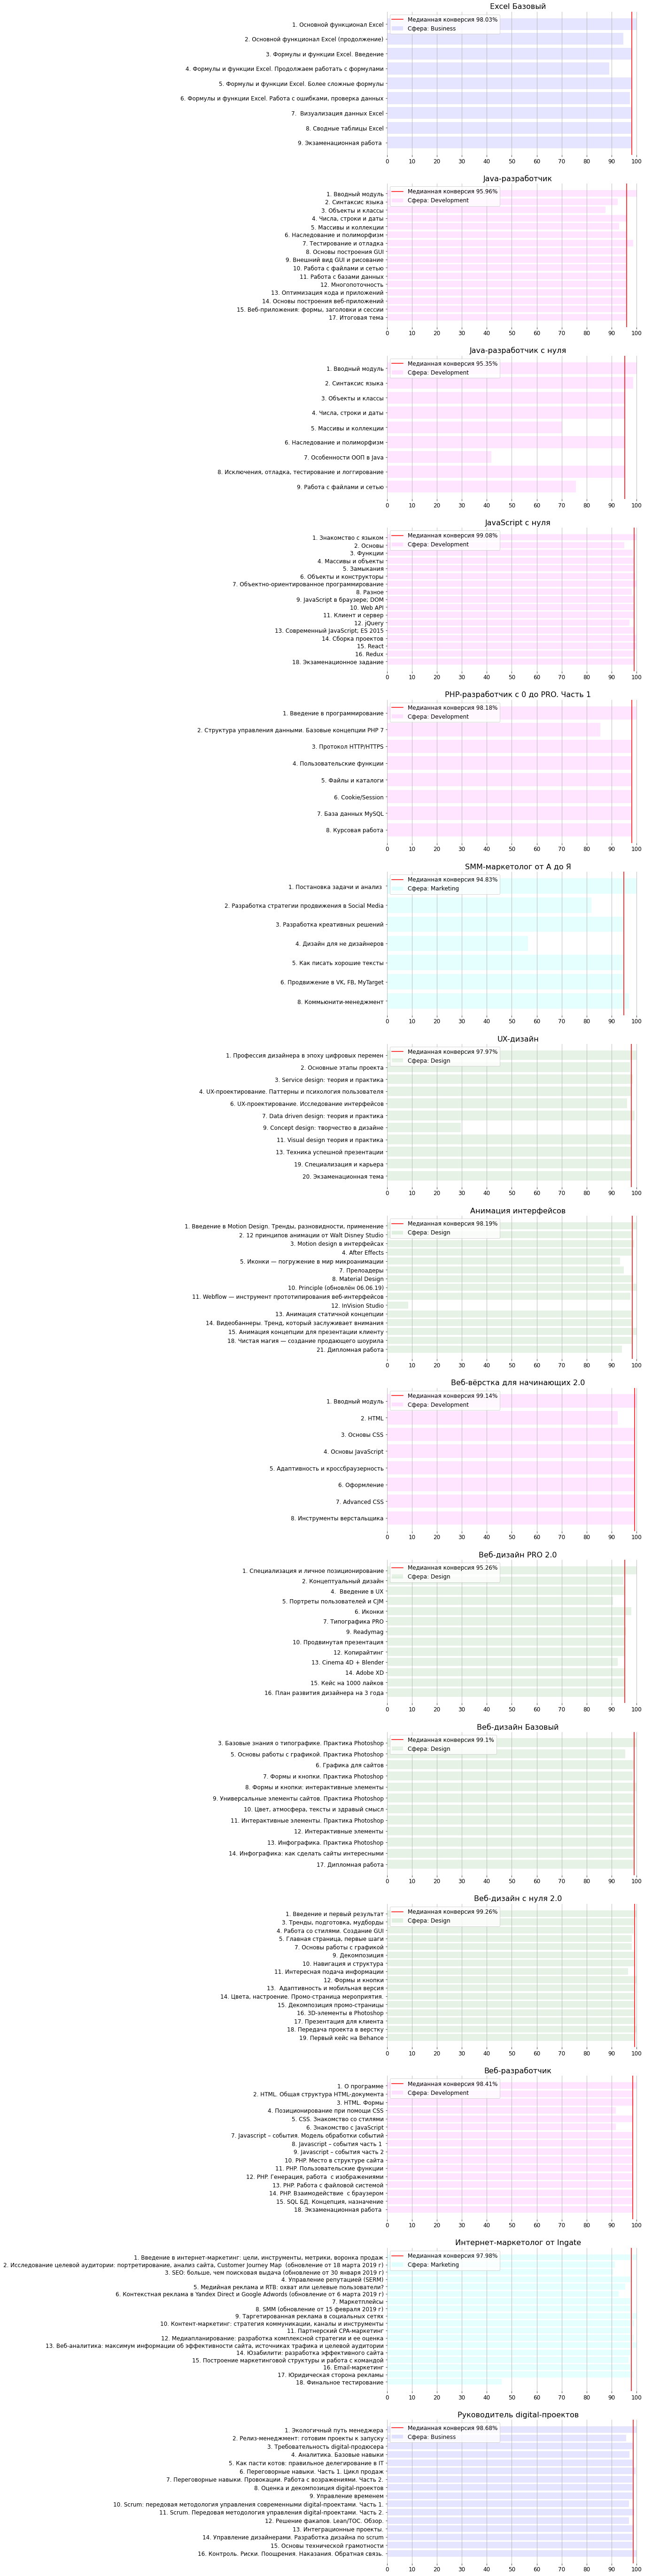

In [103]:
fig,axes = plt.subplots(15,1, figsize=(10,100))

for ax,q in zip(axes.ravel(), courses_grouped_data.title.unique()):
    tmp_df = courses_grouped_data_field[courses_grouped_data_field.title.eq(q)]\
             .sort_values('module_number', ascending=False)
    
    order_modules = list(range(0, len(tmp_df)))
    list_labels = list(tmp_df.module_number.astype(str) + ". " + tmp_df.module_title)
    modules_list = list(range(0, 101, 10))
    
    median = round(tmp_df.conversion.median(), 2)
    field = tmp_df.field.iloc[0]
    
    if field == 'Business':
        color='blue'
    elif field == 'Design':
        color='green'
    elif field == 'Marketing':
        color='cyan'
    else:
        color='magenta'
    
    ax.barh(y=tmp_df['module_number'].astype(str), width=tmp_df['conversion'], alpha=0.1, label='Сфера: {}'.format(field)\
            , color=color)
    ax.axvline(x=median, color='red', label='Медианная конверсия {}%'.format(median))
    
    ax.set_title(q, fontsize=16)
#     ax.set_ylabel('Номер модуля', fontsize=20)
    ax.set_xticks(modules_list)
    ax.set_yticks(order_modules)
    ax.set_yticklabels(list_labels)
#     ax.set_yticklabels(list_labels, ha='left', position=(-0.005, 0))
#     ax.yaxis.label.set_visible(False)
    ax.grid(axis='x')
    ax.legend(loc='upper left', title=None, fontsize=12, title_fontsize=14)
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

    ax.tick_params(labelsize=12)
#     plt.tight_layout()

## 5. Метрика успеваемости 

&nbsp;&nbsp;&nbsp;&nbsp;*(необязательное задание)*

Иногда студенты берут курсы, которые оказываются для них неподъемными. Это может быть как по причинам недостаточной изначальной подготовки, так и по причинам, связанным с низкой мотивацией студента. Для улучшения качества контента полезно выявить причину. На основании имеющихся данных придумана метрика успеваемости студента для выявления таких студентов на каждом курсе, чтобы предоставить продюсерам список проблемных студентов. 

Метрикой успеваемости выступает время выполнения каждым студентом каждого модуля. Если время выполения модуля уже превышает 3 сигма из выборки, которая имеет длительности прохождения этого модуля студентами, которые модуль закончили, - то предполагается, что у студента могут быть сложности с его выполнением.

In [21]:
# определенеие времени обучения прохождения модулей каждым студентом, который закончил модуль, модули без ДЗ не учитывабтся

done_homework_data = total_courses_data.copy()[
    (total_courses_data.is_homework == True) &
    (total_courses_data.status == 'done')
]

len_studing_data_dh = done_homework_data\
    .groupby(['title', 'module_title' ,'student_id'])\
    .apply(lambda x: max(x.finish_date) - min(x.start_date))\
    .reset_index()\
    .rename(columns={0: 'len_studing'})

len_studing_data_dh['len_studing'] = len_studing_data_dh.len_studing.dt.days.astype(int)

len_studing_data_dh

,title,module_title,student_id,len_studing
0,Excel Базовый,Визуализация данных Excel,006f0189ec657741ee4d53474c7a258d,4
1,Excel Базовый,Визуализация данных Excel,0098ca12f73a56dadbf6099389305d80,17
2,Excel Базовый,Визуализация данных Excel,03ce810dd7f993c5eb0c4acc5098df35,6
3,Excel Базовый,Визуализация данных Excel,0983972a9d5cd8bf91ed598bc96ca9b1,11
4,Excel Базовый,Визуализация данных Excel,0a423cff8d480ba89d8d315cdf1b6d07,66
...,...,...,...,...
43422,Руководитель digital-проектов,Экологичный путь менеджера,fc462d9bfabdcd26f35362661cb4fccb,0
43423,Руководитель digital-проектов,Экологичный путь менеджера,fca3ef866ec16635ff9a34176747656d,3
43424,Руководитель digital-проектов,Экологичный путь менеджера,fd3a3ed82b4e1ea88680494282c4d7ca,11
43425,Руководитель digital-проектов,Экологичный путь менеджера,ff0f96efc5bc705cd50cda0baa15a879,2


In [27]:
# определение верхней границы 3-х сигм длительности проходжения каждого модуля

# верхняя граница трех стандартных отклонений
df_upper_level_len_studing = (len_studing_data_dh.groupby(['title', 'module_title']).len_studing.mean() \
    + 3*len_studing_data_dh.groupby(['title', 'module_title']).len_studing.std()).reset_index()\
    .rename(columns={"len_studing": 'upper_level_std_len_studing'})
df_upper_level_len_studing

,title,module_title,upper_level_std_len_studing
0,Excel Базовый,Визуализация данных Excel,65.979249
1,Excel Базовый,Основной функционал Excel,53.257406
2,Excel Базовый,Основной функционал Excel (продолжение),39.350238
3,Excel Базовый,Сводные таблицы Excel,75.733769
4,Excel Базовый,Формулы и функции Excel. Более сложные формулы,54.291654
...,...,...,...
185,Руководитель digital-проектов,Решение факапов. Lean/TOC. Обзор.,141.319159
186,Руководитель digital-проектов,Требовательность digital-продюсера,126.862363
187,Руководитель digital-проектов,Управление временем,56.640849
188,Руководитель digital-проектов,Управление дизайнерами. Разработка дизайна по ...,102.839392


In [28]:
# поиск студентов и длительности их текущей длительности выполенния домашнего задания

not_done_homework_data = total_courses_data.copy()[
    (total_courses_data.is_homework == True) &
    (total_courses_data.status == 'start')
]

last_date = done_homework_data.finish_date.max()
not_done_homework_data.finish_date.fillna(last_date, inplace=True)

len_studing_data_ndh = not_done_homework_data\
    .groupby(['title', 'module_title' ,'student_id'])\
    .apply(lambda x: max(x.finish_date) - min(x.start_date))\
    .reset_index()\
    .rename(columns={0: 'len_current_module_studing'})

len_studing_data_ndh['len_current_module_studing'] = len_studing_data_ndh.len_current_module_studing.dt.days.astype(int)

len_studing_data_ndh

,title,module_title,student_id,len_current_module_studing
0,Excel Базовый,Визуализация данных Excel,02d99847edc5c3a4441c844dcbdcd0aa,157
1,Excel Базовый,Визуализация данных Excel,287c5d0e975cfb68189c906e588102b6,267
2,Excel Базовый,Визуализация данных Excel,3a86afae2246b3b81d8c8cdeb4d06b34,1
3,Excel Базовый,Визуализация данных Excel,40c1dd2ee7cdc61660b0853cd5f0ce56,90
4,Excel Базовый,Визуализация данных Excel,44ab74614167759406f05ba346cf266e,0
...,...,...,...,...
6550,Руководитель digital-проектов,Экологичный путь менеджера,ca243b1d275d38c29cee851b2bf10950,237
6551,Руководитель digital-проектов,Экологичный путь менеджера,e0ada954b5ca6664b697efc1cb73e869,0
6552,Руководитель digital-проектов,Экологичный путь менеджера,eff7c65e3309954eb1329d6146caf5b2,181
6553,Руководитель digital-проектов,Экологичный путь менеджера,fc35db9425cd7483d03e017e26e94b51,61


In [29]:
# объеденение датафреймов с граничными значениями длительности выполнения каждого модуля и 
# длительностью выполенния модулей каждым студентом

unite_dataframe = df_upper_level_len_studing.merge(len_studing_data_ndh, how='left', on=['title', 'module_title'])

In [30]:
unite_dataframe

,title,module_title,upper_level_std_len_studing,student_id,len_current_module_studing
0,Excel Базовый,Визуализация данных Excel,65.979249,02d99847edc5c3a4441c844dcbdcd0aa,157
1,Excel Базовый,Визуализация данных Excel,65.979249,287c5d0e975cfb68189c906e588102b6,267
2,Excel Базовый,Визуализация данных Excel,65.979249,3a86afae2246b3b81d8c8cdeb4d06b34,1
3,Excel Базовый,Визуализация данных Excel,65.979249,40c1dd2ee7cdc61660b0853cd5f0ce56,90
4,Excel Базовый,Визуализация данных Excel,65.979249,44ab74614167759406f05ba346cf266e,0
...,...,...,...,...,...
6547,Руководитель digital-проектов,Экологичный путь менеджера,53.721720,ca243b1d275d38c29cee851b2bf10950,237
6548,Руководитель digital-проектов,Экологичный путь менеджера,53.721720,e0ada954b5ca6664b697efc1cb73e869,0
6549,Руководитель digital-проектов,Экологичный путь менеджера,53.721720,eff7c65e3309954eb1329d6146caf5b2,181
6550,Руководитель digital-проектов,Экологичный путь менеджера,53.721720,fc35db9425cd7483d03e017e26e94b51,61


In [31]:
# определение студентов, которые выполняют дз уже слишком долго

students_id = unite_dataframe[unite_dataframe.len_current_module_studing > unite_dataframe.upper_level_std_len_studing]\
    .student_id.values

In [32]:
students_id[:5]

array(['02d99847edc5c3a4441c844dcbdcd0aa',
       '287c5d0e975cfb68189c906e588102b6',
       '40c1dd2ee7cdc61660b0853cd5f0ce56',
       '46817a4bfebbc31c01b72fba21a59fcd',
       '560c60fe73348278bc9c6840ef1d1ce2'], dtype=object)